<a href="https://colab.research.google.com/github/rohitkadhane/Spring/blob/main/credit_card_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Predicting default of credit card clients*
*A binary classification case*

## [Jesús Conde Trugeda](https://www.linkedin.com/in/jesuscondetrugeda/)
September 2022

-------------------------

### Table of contents

1.   [Introduction](#Introduction)
2.   [EDA - Exploratory Data Analysis](#EDA_-_Exploratory_Data_Analysis)
3.   [Feature Engineering](#Feature_Engineering)
4.   [Data pre-processing for training and testing](#Data_pre-processing)
5.   [Model Training and Testing](#Modelling)
6.   ["Meta-Dataset" and "Meta-Model"](#Meta)
7.   [Summary & Conclusions](#Conclusions)



# 1.Introduction
<a id='Introduction'></a>

This project corresponds to the Master's Thesis of the [Big Data & Business Analytics Master](https://www.masterbigdatauned.com/) at UNED, the Spanish national distance learning university.


The source of the data set is the [UCI Machine Learning Repositary](http://archive.ics.uci.edu/ml/index.php), which offers a great variety of open data sets.


In this case, the [Default of Credit Card Clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) has been chosen. It contains customer's descriptions, as well as payment and bill statements from **April to September 2005** from a Taiwanese financial institution.

The target of the project is to develop a Machine Learning (ML) model capable of predicting accurately the default of credit card clients.


This notebook has been uploaded to the [corresponding Kaggle site](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/code?datasetId=306&sortBy=dateCreated) as a [new kernel](https://www.kaggle.com/code/jcontr/complete-analysis-modelling-credit-card-default), achieving as of today:
*   Accuracy >95%
*   Recall / True Positive Rate >90% (for a highly imbalanced dataset)

not having seen these scores combined in any other kernel.

**Description of the variables**:
```
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.
This study reviewed the literature and used the following 23 variables as explanatory variables:
*   X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit 
*   X2: Gender (1 = male; 2 = female)
*   X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
*   X4: Marital status (1 = married; 2 = single; 3 = others).
*   X5: Age (year).
*   X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005). One variable for each month.
    The scale for the status is: "-1" = pay duly (on time); "1" = payment delay for 1 month..."8" = payment delay for 8 months
*   X12-X17: Amount of bill statement (NT dollar).One variable for each month.
*   X18-X23: Amount of previous payment (NT dollar). One variable for each month.
```

In [208]:
#Import of basic libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

In [209]:
import warnings
warnings.filterwarnings('ignore');

# 2.EDA - Exploratory Data Analysis
<a id='EDA_-_Exploratory_Data_Analysis'></a>

In [210]:
# Introduce the URL or path to the file (allows to change to a different data set)

# A) In case Google colab is used, you can upload the file as csv into the "sample_data" folder
google_colab_path = "/content/sample_data/default of credit card clients.csv"

# B) In case of loading de dataset from the URL using pandas
# Parameter "header" is set to "1" since the first row of the dataset does not contain
# The actual variable names are contained in the second row

# Loadingin Colab
data = pd.read_excel("BestCard_data.xlsx")

#Loading in local folder "data"
#data = pd.read_excel("../input/default-of-credit-card-clients/", header=1)

## 2.1. First glance at the dataset
Data is downloaded directly from the [source](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients): 

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
# Showing the first rows of our dataframe
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


The data set has the following **size**:

In [213]:
# Dimensions of our data frame
print("Number of columns:   ", np.shape(data)[1])
print("Number of rows:   ", np.shape(data)[0])

Number of columns:    31
Number of rows:    26664


Analyzing the **type of the features** and counting the amount of **empty values** for each one:

In [214]:
# Printing information of the variables
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

There are **no empty values** and all features are **integers**, although some of them could be actually categorical (see chapter 3 "Feature Engineering").



Some **features' name** do not describe at first glance its meaning (according to the definitions of Chapter 1), so they are changed. Some other rules like using only **lower case** or removing **spaces** are also applied.

In [215]:
# Renaming some of the column names for a better understanding
data.rename(columns= {'LIMIT_BAL':'given_credit',
                       'PAY_0':'status_apr',
                       'PAY_2':'status_may',
                       'PAY_3':'status_jun',
                       'PAY_4':'status_jul',
                       'PAY_5':'status_aug',
                       'PAY_6':'status_sep',

                       'BILL_AMT1':'bill_apr',
                       'BILL_AMT2':'bill_may',
                       'BILL_AMT3':'bill_jun',
                       'BILL_AMT4':'bill_jul',
                       'BILL_AMT5':'bill_aug',
                       'BILL_AMT6':'bill_sep',
                       
                       'PAY_AMT1':'pay_apr',
                       'PAY_AMT2':'pay_may',
                       'PAY_AMT3':'pay_jun',
                       'PAY_AMT4':'pay_jul',
                       'PAY_AMT5':'pay_aug',
                       'PAY_AMT6':'pay_sep',
                       },
                        
            inplace = True)

# As a syntaxis rule, the rest of the column names are changed to lower case
data.columns = data.columns.str.lower()

#Blank spaces are also replaced by "_"
data.columns = data.columns.str.replace(" ", "_")

#Our tatget variable has a very long name, so it is shortened to "default_payment"
data.rename(columns= {'default payment next month':'default_payment'}, inplace = True)

In [216]:
data.head(0);

## 2.2 Numerical exploration of the features

The column `id` is deleted since it does not add any value to our data set.  The same information is already contained in the row number.

The features are devided in 2 groups, just for visualization purposes:

In [217]:
# First group: Columns 1 to 8 (index column "0" is skipped)
data.iloc[:,1:11].describe()

,given_credit,sex,education,marriage,age,pay_1,status_may,status_jun,status_jul,status_aug
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [218]:
#Start with another dataset "data_clean", to keep a copy of the original data untouched
data_clean = data
data_clean

,id,given_credit,sex,education,marriage,age,pay_1,status_may,status_jun,status_jul,...,pay_jul,pay_aug,pay_sep,default_payment_next_month,education_cat,graduate_school,high_school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,high school,0,1,0,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,high school,0,1,0,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,university,0,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,high school,0,1,0,0,0


In [219]:
#Removing the column "id"
data_clean.drop("id",axis=1,inplace=True)

* There are large differences between the min.(10k) and max. (1000k) values in `given_credit`, while the median lies at 140k. However, these values seem plausible.
* The feature `sex` contains only the values `1`(male) and `2`(female), which will be transformed later to `0` and `1`, as a dummy feature.
* In `education`, additional values not contained in the description are also found.
* The same happens with the variable `marriage`, although the values found do not match the description in the data [source](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).


Let's explore `marriage` and `education` in detail:


In [220]:
#Feature "sex"

#Substituting the original with sparse values. "0" for Male and "1" for Female
data_clean.loc[data_clean['sex']==1, 'sex']=0
data_clean.loc[data_clean['sex']==2, 'sex']=1

**`marriage`**

It will be assumed that the values of the data source description are correct ("1" = married; "2" = single; "3" = others). 

The value "0" has very few values and is asigned to the group "others".

In [221]:
marriage = pd.DataFrame()

In [222]:
#Frequency table by marriage value
marriage["qty_data"] = pd.DataFrame(data.marriage.value_counts())

#Mean age by marriage value:
marriage["mean_age"] = pd.DataFrame(round(data.groupby("marriage")["age"].mean(),2))

#Mean default_payment
marriage["deafult_rate"] = pd.DataFrame(round(data.groupby("marriage")["default_payment_next_month"].mean(),2))

In [223]:
marriage.sort_index()

,qty_data,mean_age,deafult_rate
1,12172,40.04,0.23
2,14158,31.45,0.21
3,334,42.25,0.24


In [224]:
#Variable "marriage"

# The values "0", in marriage, with low frequencies and not defined are be categorized as 'other' ("3")
data_clean.loc[(data_clean['marriage']==0),'marriage']=3

**`education`**

There are only supposed to be 4 categories: "1" = graduate school; "2" = university; "3" = high school; "4" = others, but we find more values in the dataset.

In [225]:
education = pd.DataFrame()

#Frequency table by marriage value
education["qty_data"] = pd.DataFrame(data.education.value_counts())

#Mean age by marriage value:
education["mean_age"] = pd.DataFrame(round(data.groupby("education")["age"].mean(),2))

#Mean default_payment
education["deafult_rate"] = pd.DataFrame(round(data.groupby("education")["default_payment_next_month"].mean(),2))

In [226]:
education.sort_index()

,qty_data,mean_age,deafult_rate
1,9412,34.29,0.19
2,12458,34.72,0.24
3,4380,40.28,0.26
4,414,36.11,0.07


Values not contained in the source description **"0", "5" and "6" have very low frequency**. They are **assigned to "others"** with the value "4".

In [162]:
## Applying the tranformation explained above

In [227]:
#Feature "education"

# The values "0", "5" and "6" in education, with low frequencies and not defined are be categorized as 'Other' (4)
data_clean.loc[(data_clean['education']==0) | (data_clean['education']==5) | (data_clean['education']==6),
               'education']=4

**`status_XX`**

The source decribes the following meaning for each value:  *-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above*

However, it can be observed that the value range goes from "-2" to "+8".

As an example, observe the asolute frequencey and default rate for each value in `status_apr`:

In [228]:
status = pd.DataFrame()

#Frequency table by marriage value
status["qty_data"] = pd.DataFrame(data.status_aug.value_counts())

#Mean age by marriage value:
status["mean_age"] = pd.DataFrame(round(data.groupby("status_aug")["age"].mean(),2))

#Mean default_payment
status["deafult_rate"] = pd.DataFrame(round(data.groupby("status_aug")["default_payment_next_month"].mean(),2))

In [229]:
status.sort_index()

,qty_data,mean_age,deafult_rate
-2,4056,36.72,0.20
-1,4949,36.23,0.16
0,15032,35.05,0.19
2,2335,34.79,0.54
3,151,36.07,0.63
4,71,35.20,0.59
5,14,35.29,0.64
6,2,31.00,1.00
7,53,35.51,0.85
8,1,47.00,1.00


*   There are values not explained in the description (such as "-2").
*   Negative values clearly have more amount of data and lower default rates.

It is decided not to apply any transformation to this group of variables. `status_XX` will be explored in more detail graphically in next chapter.

Let's explore the **rest of the features** in the data set:


In [230]:
# Second group: Columns 9 to 16
data.iloc[:,11:25].describe()

,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pay_apr,pay_may,pay_jun,pay_jul,pay_aug,pay_sep,default_payment_next_month
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047,0.221797
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185,0.415463
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000,0.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000,0.000000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


No anomalies are observed among the variables `bill_xxx` or `pay_xxx`. They will be also explored graphically in the next chapter.

In [167]:
# Let's check the dataset after the changes:
#data_clean.info()

## 2.3 Distribution of the target variable `default_payment`

In [231]:
# Use "Set3" as standard for qualitative categories
colors = sns.color_palette('Set2')

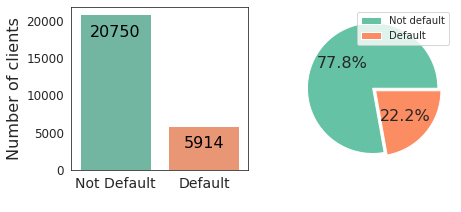

In [232]:
fig, (ax0,ax1) =  plt.subplots(1,2, figsize=(7, 3))

colors = sns.color_palette('Set2')

#Barplot with absolute frequencies
sns.countplot(ax = ax0, data=data, x="default_payment_next_month",palette=colors, order = [0,1])
ax0.set_xlabel(" ")
ax0.set_ylabel("Number of clients", fontsize=16)
ax0.set_yticklabels(ax0.get_yticks().astype("int"), size = 12)
ax0.set_xticklabels(["Not Default", "Default"], size = 14)



for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height()+1000)), ha='center', va='top', color='black', size=16)
plt.ylim(0,25000)

#Pie chart with relative frequencies

ax1 = data["default_payment_next_month"].value_counts().plot(kind='pie', labels=['',''], 
                                        autopct='%1.1f%%', colors= colors, 
                                        explode=[0,0.06], textprops={"fontsize":16})
plt.ylabel(' ')
plt.legend(labels=['Not default','Default']);

The target feature is **imbalanced**. This may handicap the prediction performance of the later models, if they predict more precisely *not defaulting* than *defaulting*. The metrics for the evaluation of the model will have to consider this, as the overall *Accuracy* value may give a false impresion of good performance.

## 2.4. Graphical Exploration

In [233]:
# New data set "data_visu" is used in case some tranformations are needed only for visualization puposes, but
#are not intended to be apply onto our data set for the general purpose:

data_visu = pd.DataFrame(data_clean)

In [234]:
from collections import Counter

###  2.4.1 Categorical variables

These features are mainly explored through absolute and relative frequency of the target feature.

**1) Sex**: The charts below show the **default rate** is slightly **higher** at **males** (24% vs. 21%). There are roughly 50% more of females than males. 

In [235]:
print("Amount of data:")
print("% Male:  ", round((Counter(data_visu.sex)[0]/len(data_visu.sex)*100),1))
print("% Female:", round(Counter(data_visu.sex)[1]/len(data_visu.sex)*100,1))

Amount of data:
% Male:   39.7
% Female: 60.3


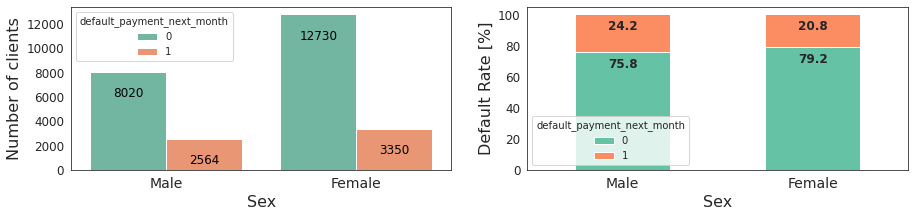

In [236]:
# Sex

#Porportion table for each sex in %
cross_tab_prop = round(pd.crosstab(index=data_visu['sex'],
                             columns=data_visu['default_payment_next_month'],
                             normalize="index")*100, 1)

#2 Subplots side by side
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(15, 3))



plt.ylabel(' ')
plt.legend(labels=['Male','Female']);




#Left plot: absolute values
sns.set_style('white')
sns.countplot(ax = ax0, data=data, x="sex",palette=colors, hue="default_payment_next_month", order = [0,1])
ax0.set_xlabel("Sex", fontsize=16)
ax0.set_ylabel("Number of clients", fontsize=16)
ax0.set_yticklabels(ax0.get_yticks().astype("int"), size = 12)
ax0.set_xticklabels(["Male", "Female"], size = 14)


for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)

#Right plot: porportion for each category
cross_tab_prop.plot(ax=ax1, kind='bar', 
                    stacked=True, 
                    color=colors
                   )

for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-10,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
  )

plt.xlabel("Sex", fontsize=16)
plt.ylabel("Default Rate [%]", fontsize=16)
plt.xticks(rotation = 0)
ax1.set_xticklabels(["Male", "Female"], size = 14)
plt.yticks(fontsize=12);

**2) Marital Status**: **Singles** tend slightly to **default less** than married people. The number of clients within "others" is not significant (1,3%). 

In [237]:
print("Amount of data:")
print("% Married: ", round(Counter(data_visu.marriage)[1]/len(data_visu.marriage)*100,1))
print("% Single:  ", round(Counter(data_visu.marriage)[2]/len(data_visu.marriage)*100,1))
print("% Others:   ", round(Counter(data_visu.marriage)[3]/len(data_visu.marriage)*100,1))

Amount of data:
% Married:  45.6
% Single:   53.1
% Others:    1.3


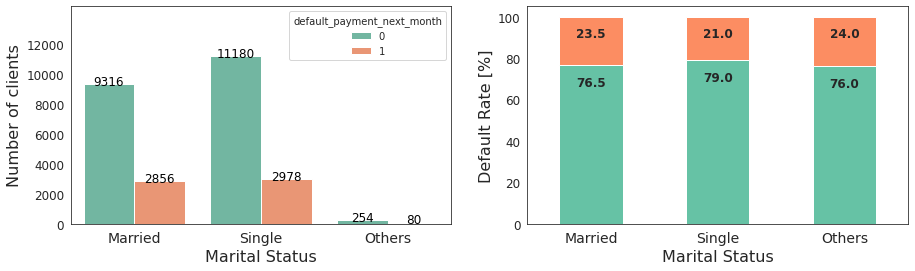

In [238]:
#Marriage
#Porportion table for each marital status in %
cross_tab_prop = round(pd.crosstab(index=data_visu['marriage'],
                             columns=data_visu['default_payment_next_month'],
                             normalize="index")*100, 1)

#2 Subplots side by side
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(15, 4))

#Left plot: absolute values
sns.set_style('white')
sns.countplot(ax = ax0, data=data, x="marriage",palette=colors, hue="default_payment_next_month")
ax0.set_xlabel("Marital Status", fontsize=16)
ax0.set_ylabel("Number of clients", fontsize=16)
ax0.set_yticklabels(ax0.get_yticks().astype("int"), size = 12)
ax0.set_xticklabels(["Married", "Single", "Others"], size = 14)
ax0.set(ylim=(0, 14500))

for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+1600), ha='center', va='top', color='black', size=12)


#Right plot: porportion for each category
cross_tab_prop.plot(ax=ax1, kind='bar', 
                    stacked=True, 
                    color=colors
                   )

for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-10,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
  )
ax1.get_legend().remove()
plt.xlabel("Marital Status", fontsize=16)
plt.ylabel("Default Rate [%]", fontsize=16)
plt.xticks(rotation = 0)
ax1.set_xticklabels(["Married", "Single", "Others"], size = 14)
plt.yticks(fontsize=12);

**3) Education**: **Lower education** levels (high school) show **higher default reates** than higher levels (e.g. graduate school).

The group "others" has an insignificant amount of examples, although there are very few defaulter within them.

In [239]:
print("Amount of data:")
print("% Grad.School: ", round(Counter(data_visu.education)[1]/len(data_visu.education)*100,1))
print("% Univ.:       ", round(Counter(data_visu.education)[2]/len(data_visu.education)*100,1))
print("% High School: ", round(Counter(data_visu.education)[3]/len(data_visu.education)*100,1))
print("% Others:       ", round(Counter(data_visu.education)[4]/len(data_visu.education)*100,1))

Amount of data:
% Grad.School:  35.3
% Univ.:        46.7
% High School:  16.4
% Others:        1.6


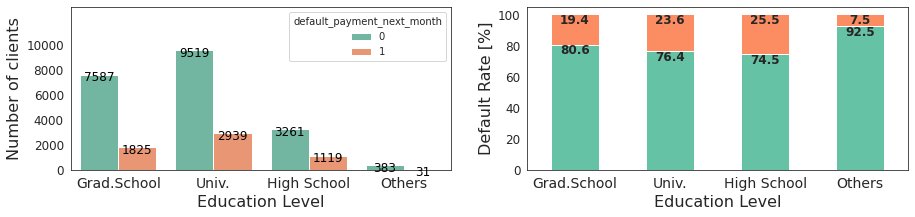

In [240]:
#Education
#Porportion table for each education level in%
cross_tab_prop = round(pd.crosstab(index=data_visu['education'],
                             columns=data_visu['default_payment_next_month'],
                             normalize="index")*100, 1)

#2 Subplots side by side
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(15, 3))

#Left plot: absolute values
sns.set_style('white')
sns.countplot(ax = ax0, data=data, x="education",palette=colors, hue="default_payment_next_month")
ax0.set_xlabel("Education Level", fontsize=16)
ax0.set_ylabel("Number of clients", fontsize=16)
ax0.set_yticklabels(ax0.get_yticks().astype("int"), size = 12)
ax0.set_xticklabels(["Grad.School", "Univ.", "High School", "Others"], size = 14)

ax0.set(ylim=(0, 13000))

for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+1500), ha='center', va='top', color='black', size=12)


#Right plot: porportion for each category
cross_tab_prop.plot(ax=ax1, kind='bar', 
                    stacked=True, 
                    color=colors
                   )

for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-6,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
  )
ax1.get_legend().remove()
plt.xlabel("Education Level", fontsize=16)
plt.ylabel("Default Rate [%]", fontsize=16)
plt.xticks(rotation = 0)
ax1.set_xticklabels(["Grad.School", "Univ.", "High School", "Others"], size = 14)
plt.yticks(fontsize=12);

### 2.4.2 Numerical features

**1) Given credit**
*   Both groups show similar distributions
*   There are some outliers in both groups, always with high values. There is even one with a given credit of 1000k, who unsurprinsingly does not default.
*   **Higher given credit** tend to have **lower default rates** (seen graphic with rates grouped by "credit groups")


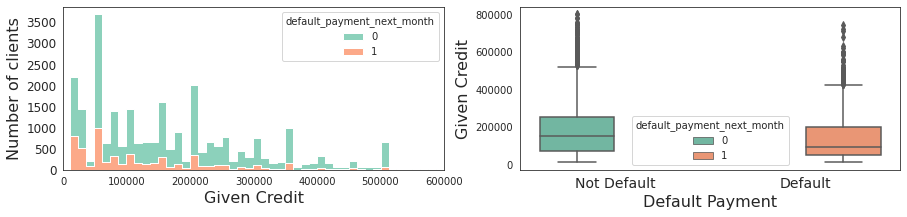

In [241]:
# Given credit

#2 Subplots side by side
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(15, 3))

sns.set_style('white')
sns.histplot(ax = ax0, data=data_visu, x="given_credit", hue="default_payment_next_month", shrink=.8, element="step" ,
             multiple = 'stack', palette="Set2")
ax0.set_xlim(0,600000)
ax0.set_xlabel("Given Credit", fontsize=16)
ax0.set_ylabel("Number of clients", fontsize=16)
ax0.set_yticklabels(ax0.get_yticks().astype("int"), size = 12)




sns.boxplot(ax = ax1, data=data_visu, x="default_payment_next_month", y="given_credit", hue = "default_payment_next_month" ,palette = "Set2")
ax1.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel("Default Payment", fontsize=16)
ax1.set_ylabel("Given Credit", fontsize=16)
ax1.set_xticklabels(["Not Default", "Default"], size = 14);


In [242]:
data_visu["CF_credit_bins"]=pd.cut(data_visu["given_credit"],
                              [0,10000, 20000, 30000, 40000, 50000,100000,
                               200000, 300000, 400000, 500000, 1000000]).astype('str')

#Converting the column to the type "category
data_visu['CF_credit_bins'] = data_visu.CF_credit_bins.astype('category');

In [243]:
#Defining the groups for the graphic next:
cats = ['(0, 10000]', '(10000, 20000]', '(20000, 30000]', '(30000, 40000]', '(40000, 50000]','(50000, 100000]',
'(100000, 200000]','(200000, 300000]','(300000, 400000]','(400000, 500000]','(500000, 1000000]'];

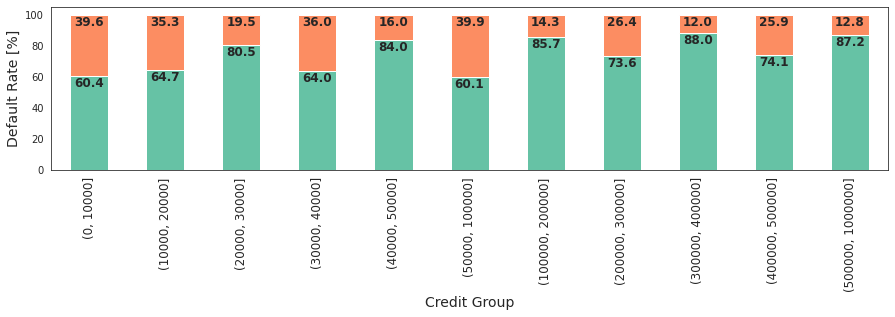

In [244]:
# Ordering by given credit value
data_visu.sort_values('given_credit', inplace=True)

#Frequency table:
cross_tab_prop = round(pd.crosstab(index=data_visu['CF_credit_bins'],
                             columns=data_visu['default_payment_next_month'],
                             normalize="index")*100,1)




# 100% stacked barlplot with thre frequencies
ax1 = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=colors,
                    figsize=(15, 3),
                   )
plt.legend(loc="upper left", ncol=1)
plt.xlabel("Credit Group", size=14)
plt.ylabel("Default Rate [%]", size =14)
ax1.get_legend().remove()
plt.xticks(rotation=90);
ax1.set_xticklabels(cats, size = 12)



for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-7,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
      );

**2) Age**

*   There are **no significant differences in the distributions** of defaulters and not-defaulters at first the look into the histograms or boxplots.

*   Default rate seem to have a minimun in the groups from 25 to 40 years old, which also the groups with more avaible data

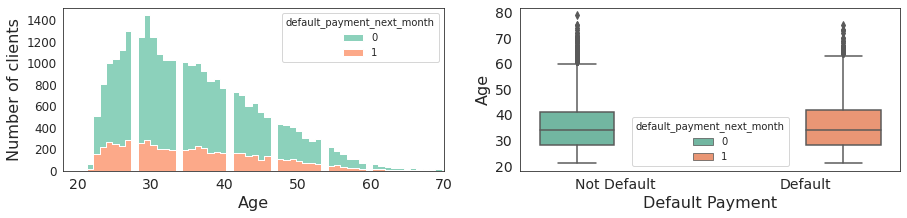

In [245]:
# Age

#2 Subplots side by side
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(15, 3))

sns.set_style('white')
sns.histplot(ax = ax0, data=data_visu, x="age", hue="default_payment_next_month", shrink=.5, element="step" ,
             multiple = 'stack', palette="Set2")
ax0.set_xlim(18,70)
ax0.set_xlabel("Age", fontsize=16)
ax0.set_ylabel("Number of clients", fontsize=16)
ax0.set_yticklabels(ax0.get_yticks().astype("int"), size = 12)
ax0.set_xticklabels( ax0.get_xticks().astype("int"), size = 14)


sns.boxplot(ax = ax1, data=data_visu, x="default_payment_next_month", y="age", hue = "default_payment_next_month" ,palette = "Set2")
ax1.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel("Default Payment", fontsize=16)
ax1.set_ylabel("Age", fontsize=16)
ax1.set_xticklabels(["Not Default", "Default"], size = 14)
ax1.set_yticklabels(ax1.get_yticks().astype("int"), size = 14);

In [246]:
# Bins for Age
data_visu["CF_age_bins"]=pd.cut(data_visu["age"],
                              [0,20, 25, 30, 40, 50,60,100]).astype('str')

#Converting the column to the type "category
data_visu['CF_age_bins'] = data_visu.CF_age_bins.astype('category')

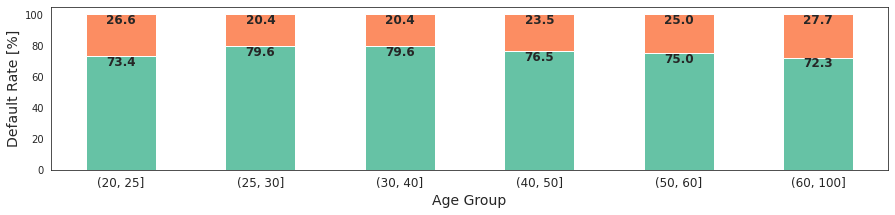

In [247]:
data_visu.sort_values('age', inplace=True)
cross_tab_prop = round(pd.crosstab(index=data_visu['CF_age_bins'],
                             columns=data_visu['default_payment_next_month'],
                             normalize="index")*100,1)


fig, (ax1) = plt.subplots(1, 1)

# 100% stacked
cross_tab_prop.plot(ax=ax1,kind='bar', 
                    stacked=True, 
                    color=colors,
                    figsize=(15, 3),
                   )

plt.legend(loc="upper left", ncol=1)
plt.xlabel("Age Group", size=14)
plt.ylabel("Default Rate [%]", size=14)
plt.xticks(rotation=0, size = 12)
ax1.get_legend().remove()



for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-6,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
      );

**3) Status_xx**

Violin chart is chosen instead of boxplots, due to the limited / discrete number of values (from "-2" to "+8").

*   Most of the clients lie between -1 (duly) and +1 (one month delay). High values are uncommon (outliers)
*   The distribuitions in each month are quite similiar, except for **april**, which is the only month with values = "1"
*   Defaulters clearly are more present at values >0

In [248]:
#Creating a new dataset to represent violin charts of all status_xx feartures together + splitting by default status

status = data_visu[ [ "status_may", "status_jun", "status_jul", "status_aug","status_sep", "default_payment_next_month"] ]

#"tidy" version of status data set from above 
formatted_status = pd.melt(status,
                       ["default_payment_next_month"],
                       var_name="status")

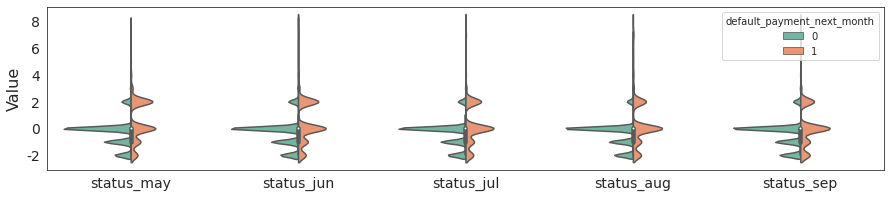

In [249]:
plt.figure(figsize=(15,3))
ax1 = sns.violinplot(data=formatted_status, x = "status", y ="value", hue = "default_payment_next_month",
               palette="Set2", split=True);
ax1.set_xlabel(" ")
ax1.set_ylabel("Value", fontsize=16)
ax1.set_yticklabels(ax1.get_yticks().astype("int"), size = 14)
ax1.set_xticklabels(["status_may", "status_jun", "status_jul", "status_aug","status_sep"], size = 14);

Next, a default rate for each value of `status_sep`is displayed.

This month has been chosen as an example. The rest of the months show very similar results:

*   Values <=0 show significant lower default rates than >0. This low rate seems constant at approximately  at 19%
*   Higher "status" values tend to higher default rates.


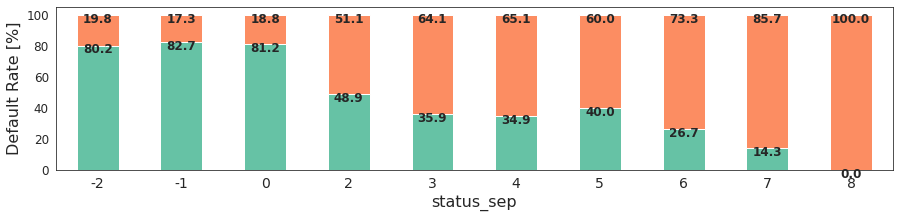

In [250]:
#Porportion table for each education level
cross_tab_prop = round(pd.crosstab(index=data_visu['status_sep'],
                             columns=data_visu['default_payment_next_month'],
                             normalize="index")*100,1)

fig, ax1 = plt.subplots(1,1, figsize=(15, 3))

#Right plot: porportion for each category
cross_tab_prop.plot(ax=ax1, kind='bar', 
                    stacked=True, 
                    color=colors
                   )
for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-5,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
  )
ax1.get_legend().remove()
plt.xlabel("status_sep", fontsize=16)
plt.ylabel("Default Rate [%]", fontsize=16)
plt.xticks(rotation = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12);

**4) Bill_month**

*    Boxplots  show that **not-defaulters** tend to have slight **higher bill values**
*   However, taking the example of september and creating groups (*bins*) of bill values, no clear trend can be observed

In [251]:
#Creating a new dataset to represent violin charts of all bill_xx feartures together + splitting by default status

bill = pd.DataFrame(data_visu[ ["bill_apr", "bill_may", "bill_jun", "bill_jul", "bill_aug","bill_sep", "default_payment_next_month"] ])

#"tidy" version of "bill" data set from above 
formatted_bill = pd.melt(bill,
                       ["default_payment_next_month"],
                       var_name="bill");

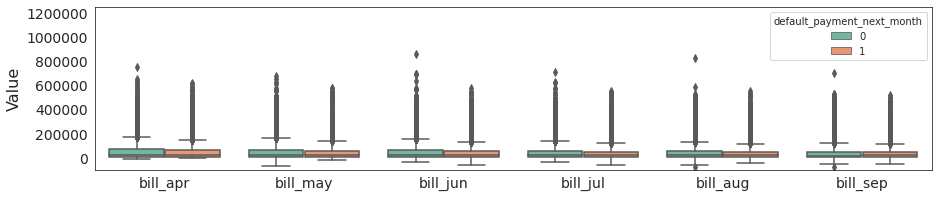

In [252]:
# Box plot using the new data set from above
# Boxplots for each month and split by default_payment valyue 0/1
plt.figure(figsize=(15,3))

ax1 = sns.boxplot(data=formatted_bill, x="bill", y="value", hue="default_payment_next_month", palette = "Set2")
ax1.set_ylim(-100000, 1250000)

plt.xticks(rotation = 0)
plt.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel(" ")
ax1.set_ylabel("Value", fontsize=16)
ax1.set_yticklabels(ax1.get_yticks().astype("int"), size = 14)
ax1.set_xticklabels(["bill_apr", "bill_may", "bill_jun", "bill_jul", "bill_aug","bill_sep" ], size = 14);

In [253]:
#Creating bins for "bill_sep"
data_visu["CF_bill_sep_bins"]=pd.cut(data_visu["bill_sep"],
                              [-500000,0, 1000, 5000, 10000, 25000,50000,100000, 1000000]).astype('str')


In [254]:
#Assigning a letter to viasualize later the groups in ascending order instead of the order calculated by the frequency table
data_visu.loc[( data_visu['CF_bill_sep_bins']=="(-500000, 0]" ),'CF_bill_sep_bins']= "a-(-500000, 0]"
data_visu.loc[( data_visu['CF_bill_sep_bins']=="(0, 1000]" ),'CF_bill_sep_bins']= "b-(0, 1000]"
data_visu.loc[( data_visu['CF_bill_sep_bins']=="(1000, 5000]" ),'CF_bill_sep_bins']= "c-(1000, 5000]"
data_visu.loc[( data_visu['CF_bill_sep_bins']=="(5000, 10000]" ),'CF_bill_sep_bins']= "d-(5000, 10000]"
data_visu.loc[( data_visu['CF_bill_sep_bins']=="(10000, 25000]" ),'CF_bill_sep_bins']= "e-(10000, 25000]"
data_visu.loc[( data_visu['CF_bill_sep_bins']=="(25000, 50000]" ),'CF_bill_sep_bins']= "f-(25000, 50000]"
data_visu.loc[( data_visu['CF_bill_sep_bins']=="(50000, 100000]" ),'CF_bill_sep_bins']= "g-(50000, 100000]"
data_visu.loc[( data_visu['CF_bill_sep_bins']=="(100000, 1000000]" ),'CF_bill_sep_bins']= "h-(100000, 1000000"

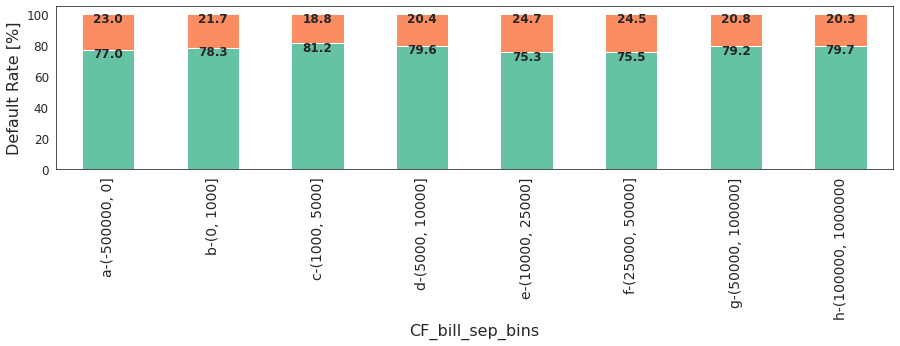

In [255]:
#Porportion table for each "bill_sep" level
cross_tab_prop = round(pd.crosstab(index=data_visu['CF_bill_sep_bins'],
                             columns=data_visu['default_payment_next_month'],
                             normalize="index")*100,1)
cross_tab_prop.sort_values("CF_bill_sep_bins")

fig, ax1 = plt.subplots(1,1, figsize=(15, 3))

#Right plot: porportion for each category
cross_tab_prop.plot(ax=ax1, kind='bar', 
                    stacked=True, 
                    color=colors
                   )
for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-5,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
  )
ax1.get_legend().remove()
plt.xlabel("CF_bill_sep_bins", fontsize=16)
plt.ylabel("Default Rate [%]", fontsize=16)
plt.xticks(rotation = 90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12);

**5) Pay_month**

*   Therenumber of **outliers** is huge at very high values (a second boxplot has been displayed for a closer look without the outliers)
*   **Not-defaulters** tend to have have **higher payment** values in every month.

In [256]:
#Creating a new dataset to represent violin charts of all pay_xx feartures together + splitting by default status
pay = pd.DataFrame(data_visu[ [ "pay_may", "pay_jun", "pay_jul", "pay_aug","pay_sep", "default_payment_next_month"] ])

#"tidy" version of "pay" data set from above 
formatted_pay = pd.melt(pay,
                       ["default_payment_next_month"],
                       var_name="pay");

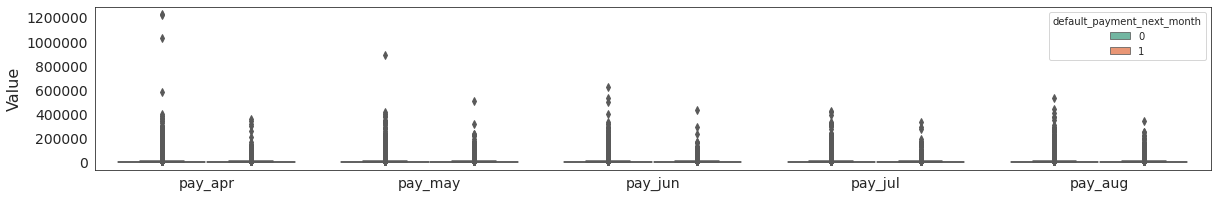

In [257]:
# Box plot using the new data set from above
# Boxplots for each month and split by default_payment valyue 0/1
plt.figure(figsize=(20,3))

ax1 = sns.boxplot(data=formatted_pay, x="pay", y="value", hue="default_payment_next_month", palette = "Set2")

plt.xticks(rotation = 0)
plt.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel(" ")
ax1.set_ylabel("Value", fontsize=16)
ax1.set_yticklabels(ax1.get_yticks().astype("int"), size = 14)
ax1.set_xticklabels(["pay_apr", "pay_may", "pay_jun", "pay_jul", "pay_aug","pay_sep" ], size = 14);

Making zoom in to the values where most of the data is distributed:

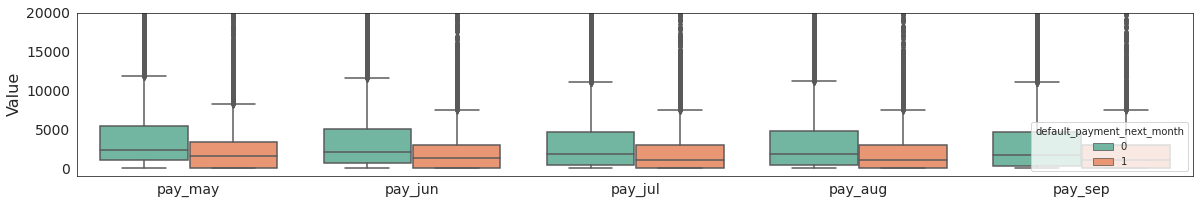

In [258]:
# Box plot using the new data set from above
# Boxplots for each month and split by default_payment valyue 0/1
plt.figure(figsize=(20,3))

ax1 = sns.boxplot(data=formatted_pay, x="pay", y="value", hue="default_payment_next_month", palette = "Set2")

ax1.set_ylim(-1000, 20000)

plt.xticks(rotation = 0)
plt.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel(" ")
ax1.set_ylabel("Value", fontsize=16)
ax1.set_yticklabels(ax1.get_yticks().astype("int"), size = 14)
ax1.set_xticklabels(["pay_may", "pay_jun", "pay_jul", "pay_aug","pay_sep" ], size = 14);

In [259]:
#Creating bins for "bill_sep"
data_visu["CF_pay_sep_bins"]=pd.cut(data_visu["pay_sep"],
                              [-10, 500, 1000, 5000, 10000,50000,100000, 1000000]).astype('str')

In [260]:
#Assigning a letter to viasualize later the groups in ascending order instead of the order calculated by the frequency table
data_visu.loc[( data_visu['CF_pay_sep_bins']=="(-10, 500]" ),'CF_pay_sep_bins']= "a-(-10, 500]"
data_visu.loc[( data_visu['CF_pay_sep_bins']=="(500, 1000]" ),'CF_pay_sep_bins']= "b-(500, 1000]"
data_visu.loc[( data_visu['CF_pay_sep_bins']=="(1000, 5000]" ),'CF_pay_sep_bins']= "c-(1000, 5000]"
data_visu.loc[( data_visu['CF_pay_sep_bins']=="(5000, 10000]" ),'CF_pay_sep_bins']= "d-(5000, 10000]"
data_visu.loc[( data_visu['CF_pay_sep_bins']=="(10000, 50000]" ),'CF_pay_sep_bins']= "e-(10000, 250000]"
data_visu.loc[( data_visu['CF_pay_sep_bins']=="(50000, 100000]" ),'CF_pay_sep_bins']= "f-(50000, 100000]"
data_visu.loc[( data_visu['CF_pay_sep_bins']=="(100000, 1000000]" ),'CF_pay_sep_bins']= "g-(100000, 1000000]"

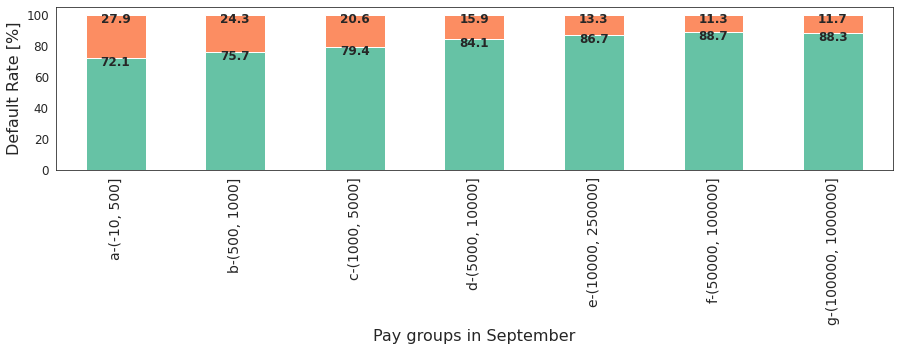

In [261]:
#Porportion table for each "pay_sep" level
cross_tab_prop = round(pd.crosstab(index=data_visu['CF_pay_sep_bins'],
                             columns=data_visu['default_payment_next_month'],
                             normalize="index")*100,1)
cross_tab_prop.sort_values("CF_pay_sep_bins")

fig, ax1 = plt.subplots(1,1, figsize=(15, 3))

#Right plot: porportion for each category
cross_tab_prop.plot(ax=ax1, kind='bar', 
                    stacked=True, 
                    color=colors
                   )
for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-5,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
  )
ax1.get_legend().remove()
plt.xlabel("Pay groups in September", fontsize=16)
plt.ylabel("Default Rate [%]", fontsize=16)
plt.xticks(rotation = 90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12);

### 2.5 Correlation between features
A *heatmap* is displayed for an overview for the cross correlation between all features (incl. the target feature, placed in last position).

There are two groups of varibales, that show significant correlation among them, also know as **"collinearity"** (dark green colors):
*   `bill_xx`: bill from one month to next one is kept at similar value

*   `status_xx` : Duly and delays in the payment trend to keep the same status from one month to the next one

Only `given_credit` and `status_xx` show siginificant correlation values vs. the tarrget feature `default_payment`.

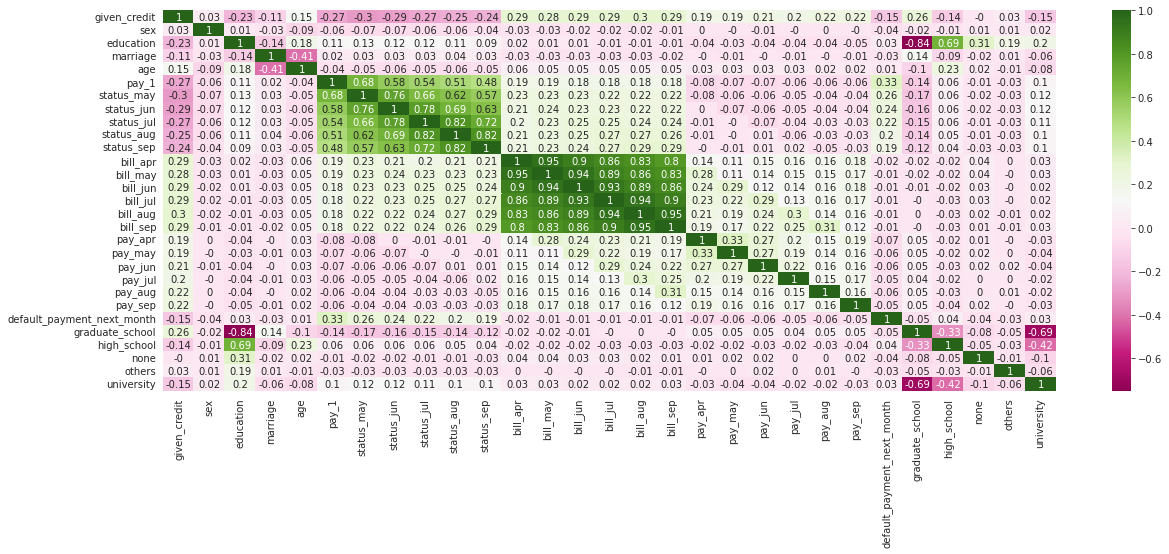

In [262]:
#Correlation matrix
plt.subplots(figsize=(20,7))
sns.heatmap(round(data_clean.corr(),2), annot=True, cmap='PiYG', vmin=-0.75, vmax=1)
plt.show()

In [263]:
data_clean.describe


<bound method NDFrame.describe of        given_credit  sex  education  marriage  age  pay_1  status_may  \
0             20000    1          2         1   24      2           2   
1            120000    1          2         2   26     -1           2   
2             90000    1          2         2   34      0           0   
3             50000    1          2         1   37      0           0   
4             50000    0          2         1   57     -1           0   
...             ...  ...        ...       ...  ...    ...         ...   
26659        220000    0          3         1   39      0           0   
26660        150000    0          3         2   43     -1          -1   
26661         30000    0          2         2   37      4           3   
26662         80000    0          3         1   41      1          -1   
26663         50000    0          2         1   46      0           0   

       status_jun  status_jul  status_aug  ...  pay_aug  pay_sep  \
0              -1    

### 2.6 Visualization of PCA components

The first 2 components of the *Principal Component Analysis* (PCA), which explain together >90% of the variance, can be used show the differences between the beahviour of the target feature's values:

In [266]:
data_clean.drop(["education_cat"],axis=1,inplace=True)

In [268]:
data_clean.drop(["CF_credit_bins"],axis=1,inplace=True)

In [269]:
from sklearn.decomposition import PCA

# Minimum percentage of variance we want to be described by the PCA resulting variables
# Higher variance means more variables
min_variance = 0.99

# Create PCA object
pca = PCA(n_components=min_variance) 

# Apply PCA to the already scaled variables
data_pca = pca.fit_transform(data_clean)

#Transform to Pandas Data Frame (assgining again the original column name is not needed now)
data_pca = pd.DataFrame(data_pca) # Create a data frame from the PCA'd data
data_pca["default_payment_next_month"] = data_clean["default_payment_next_month"]
data_pca.columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "default_payment_next_month"]

variance = round(pd.DataFrame(pca.explained_variance_ratio_.cumsum()),3)*100
variance = variance.transpose()
variance.columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9"]
variance.index = ["Cumul. variance [%]:"]
variance

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
Cumul. variance [%]:,61.2,90.8,93.9,95.4,96.3,97.2,97.9,98.6,99.1


**No significant difference** can be observed in the graphic above between deafaulters and not-defaulters and it hasn't  shown any improvement in the prediction performance. Therefore, it **will no be used for dimension reduction**.

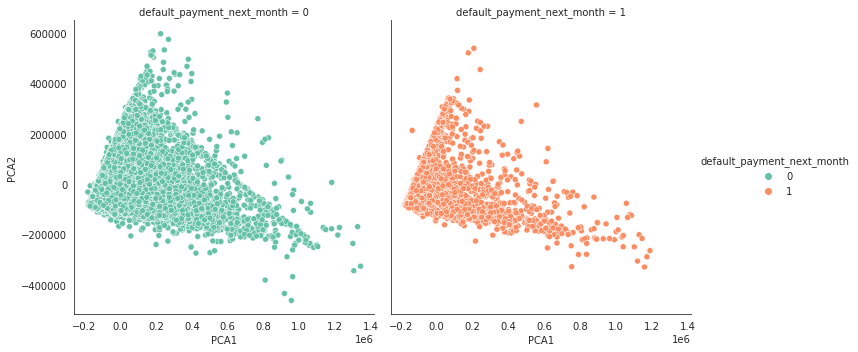

In [291]:
#Scatter plot of 1st and 2nd PCA components (explain 90,6% the variance"):
sns.relplot(
    data=data_pca, x="PCA1", y="PCA2",
    col="default_payment_next_month", hue="default_payment_next_month",
    kind="scatter",  palette ="Set2"
);

# 3.Feature Engineering
<a id='Feature_Engineering'></a>

In [292]:
data_FE = data_clean

### 3.1 Dummy features for `education`
`education` is set as a categorical variable  and substituted with 4 levels and dummy variables for each one are created:

In [293]:
#Set "education" as catigory type
data_FE["education"] = data_FE ["education"].astype("category")

#Creating dummy features
edu_dummies = pd.get_dummies(data_FE['education'], prefix='edu')

#Adding these new dummy variables to our dataset
data_FE = pd.concat( [data_FE, edu_dummies] , axis = 1)

In [294]:
#data_FE[["education", "marriage"]]
data_FE[["education", "edu_1","edu_2", "edu_3", "edu_4"]].tail(7)

,education,edu_1,edu_2,edu_3,edu_4
26657,1,1,0,0,0
26658,2,0,1,0,0
26659,3,0,0,1,0
26660,3,0,0,1,0
26661,2,0,1,0,0
26662,3,0,0,1,0
26663,2,0,1,0,0


In [295]:
# Removing the variable "education"
data_FE = data_FE.drop(columns=['education']);

In [296]:
#XGBoost does not allow "," in the feature names, so they are replaced by "-"

data_FE.columns = data_FE.columns.str.replace(",", "-") # subst. "," for "-"
data_FE.columns = data_FE.columns.str.replace(" ", "")  # deleting spaces
data_FE.columns = data_FE.columns.str.replace("(", "")  # deleting "("
data_FE.columns = data_FE.columns.str.replace(")", "")  # deleting ")"
data_FE.columns = data_FE.columns.str.replace("]", ""); # deleting "]"

In [297]:
#data_FE.iloc[:,0:15].describe()

## 3.2 Logarithmic transformation to monetary features
A very typical transformation is applied to *monetary* features: `given_credit`, `bill_xx`, and `pay_xx`, where "xx" stands for each month. This should solve the issue with the **outliers**.

### 3.2.1 Log() of `given_credit`

In [298]:
data_FE["CF_log_given_credit"] = np.log10(data_FE["given_credit"])

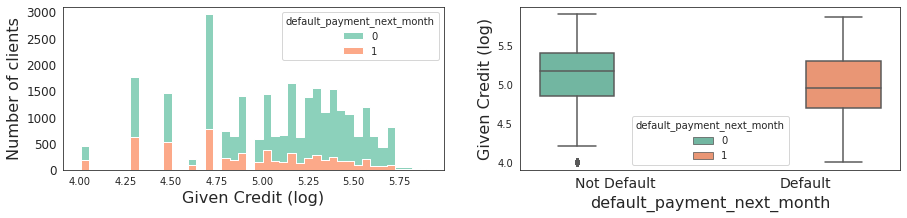

In [299]:
# Log_10 of Given credit

#2 Subplots side by side
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(15, 3))

sns.set_style('white')
sns.histplot(ax = ax0, data=data_FE, x="CF_log_given_credit", hue="default_payment_next_month", shrink=.8, element="step" ,
             multiple = 'stack', palette="Set2")
#ax0.set_xlim(0,600000)
ax0.set_xlabel("Given Credit (log)", fontsize=16)
ax0.set_ylabel("Number of clients", fontsize=16)
ax0.set_yticklabels(ax0.get_yticks().astype("int"), size = 12)




sns.boxplot(ax = ax1, data=data_FE, x="default_payment_next_month", y="CF_log_given_credit", hue = "default_payment_next_month" ,palette = "Set2")
ax1.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel("default_payment_next_month", fontsize=16)
ax1.set_ylabel("Given Credit (log)", fontsize=16)
ax1.set_xticklabels(["Not Default", "Default"], size = 14);

### 3.2.2 Log()  - `bill_xx`

In [300]:
# Attention: there are values = 0 for all "bill_xx", which will lead to "*-inf" values when apllying the log
#These cases will keep the value "0"

data_FE["CF_log_bill_apr"] = np.log10(data_FE["bill_apr"])
data_FE["CF_log_bill_may"] = np.log10(data_FE["bill_may"])
data_FE["CF_log_bill_jun"] = np.log10(data_FE["bill_jun"])
data_FE["CF_log_bill_jul"] = np.log10(data_FE["bill_jul"])
data_FE["CF_log_bill_aug"] = np.log10(data_FE["bill_aug"])
data_FE["CF_log_bill_sep"] = np.log10(data_FE["bill_sep"]);


# "-Inf" values are replaced by "0"
data_FE.loc[ (data_FE["CF_log_bill_apr"] ==  float("-inf")), "CF_log_bill_apr" ] = 0
data_FE.loc[ (data_FE["CF_log_bill_may"] ==  float("-inf")), "CF_log_bill_may" ] = 0
data_FE.loc[ (data_FE["CF_log_bill_jun"] ==  float("-inf")), "CF_log_bill_jun" ] = 0
data_FE.loc[ (data_FE["CF_log_bill_jul"] ==  float("-inf")), "CF_log_bill_jul" ] = 0
data_FE.loc[ (data_FE["CF_log_bill_aug"] ==  float("-inf")), "CF_log_bill_aug" ] = 0
data_FE.loc[ (data_FE["CF_log_bill_sep"] ==  float("-inf")), "CF_log_bill_sep" ] = 0;

In [301]:
#Creating a new dataset to represent boxplots of all bill_xx feartures together + splitting by default status

bill_log = pd.DataFrame(data_FE[ ["CF_log_bill_apr", "CF_log_bill_may", "CF_log_bill_jun", "CF_log_bill_jul", "CF_log_bill_aug","CF_log_bill_sep", "default_payment_next_month"] ])

#"tidy" version of "bill" data set from above 
formatted_bill_log = pd.melt(bill_log,
                       ["default_payment_next_month"],
                       var_name="bill_log");

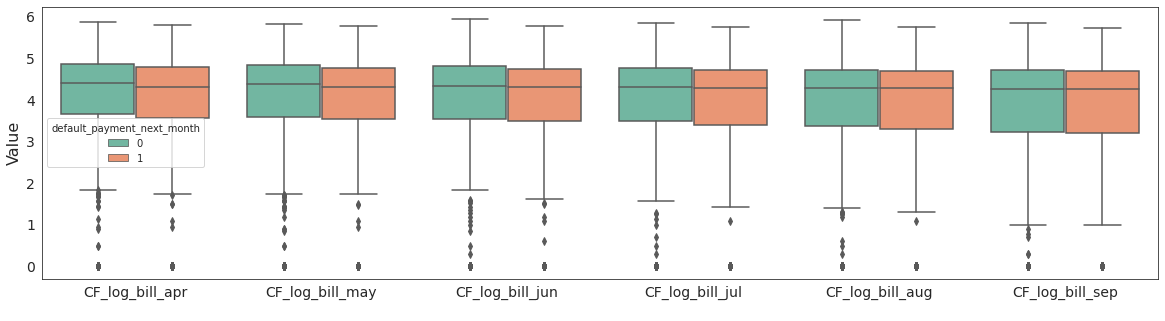

In [304]:
# Box plot using the new data set from above for log_bill_xx
# Boxplots for each month and split by default_payment valyue 0/1
plt.figure(figsize=(20,5))

ax1 = sns.boxplot(data=formatted_bill_log, x="bill_log", y="value", hue="default_payment_next_month", palette = "Set2")

plt.xticks(rotation = 0)
plt.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel(" ")
ax1.set_ylabel("Value", fontsize=16)
ax1.set_yticklabels(ax1.get_yticks().astype("int"), size = 14)
ax1.set_xticklabels(["CF_log_bill_apr", "CF_log_bill_may", "CF_log_bill_jun", "CF_log_bill_jul", "CF_log_bill_aug","CF_log_bill_sep" ], size = 14);

### 3.2.3 Log() - `pay_xx`

*   Log() cannot be applied onto values = "0". In this cases, the value is kept at "0". This can be especially observed for defaulters in the boxplot below.

In [305]:
# Attention: there are values = 0 for all "pay_xx", which will lead to "*-inf" values when apllying the log
#These cases will keep the value "0"

data_FE["CF_log_pay_apr"] = np.log10(data_FE["pay_apr"]);
data_FE["CF_log_pay_may"] = np.log10(data_FE["pay_may"]);
data_FE["CF_log_pay_jun"] = np.log10(data_FE["pay_jun"]);
data_FE["CF_log_pay_jul"] = np.log10(data_FE["pay_jul"]);
data_FE["CF_log_pay_aug"] = np.log10(data_FE["pay_aug"]);
data_FE["CF_log_pay_sep"] = np.log10(data_FE["pay_sep"]);

# "-Inf" values are replaced by "0"
data_FE.loc[ (data_FE["CF_log_pay_apr"] ==  float("-inf")), "CF_log_pay_apr" ] = 0
data_FE.loc[ (data_FE["CF_log_pay_may"] ==  float("-inf")), "CF_log_pay_may" ] = 0
data_FE.loc[ (data_FE["CF_log_pay_jun"] == float("-inf")), "CF_log_pay_jun" ] = 0
data_FE.loc[ (data_FE["CF_log_pay_jul"] ==  float("-inf")), "CF_log_pay_jul" ] = 0
data_FE.loc[ (data_FE["CF_log_pay_aug"] ==  float("-inf")), "CF_log_pay_aug" ] = 0
data_FE.loc[ (data_FE["CF_log_pay_sep"] ==  float("-inf")), "CF_log_pay_sep" ] = 0;

In [307]:
#Creating a new dataset to represent boxplots of all pay_xx feartures together + splitting by default status

pay_log = pd.DataFrame(data_FE[ ["CF_log_pay_apr", "CF_log_pay_may", "CF_log_pay_jun", "CF_log_pay_jul", "CF_log_pay_aug","CF_log_pay_sep", "default_payment_next_month"] ])

#"tidy" version of "bill" data set from above 
formatted_pay_log = pd.melt(pay_log,
                       ["default_payment_next_month"],
                       var_name="pay_log");

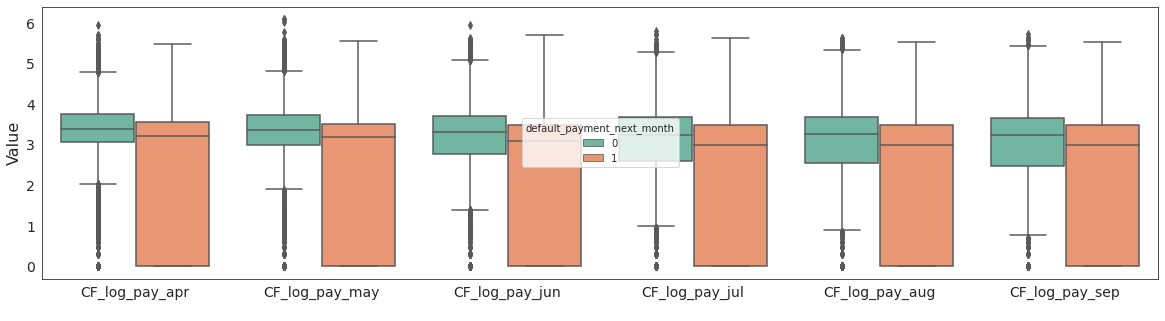

In [308]:
# Box plot using the new data set from above for log_pay_xx
# Boxplots for each month and split by default_payment valyue 0/1
plt.figure(figsize=(20,5))

ax1 = sns.boxplot(data=formatted_pay_log, x="pay_log", y="value", hue="default_payment_next_month", palette = "Set2")

plt.xticks(rotation = 0)
plt.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel(" ")
ax1.set_ylabel("Value", fontsize=16)
ax1.set_yticklabels(ax1.get_yticks().astype("int"), size = 14)
ax1.set_xticklabels(["CF_log_pay_apr", "CF_log_pay_may", "CF_log_pay_jun", "CF_log_pay_jul", "CF_log_pay_aug","CF_log_pay_sep" ], size = 14);

The original features (beofre applying the log() transformation) are removed.

In [309]:
# Removing the original feature "given_credit"
data_FE =  pd.DataFrame( data_FE.drop(columns='given_credit'))


# Removing the original features "bill_xx"

data_FE =  pd.DataFrame( data_FE.drop(columns='bill_apr') )
data_FE =  pd.DataFrame( data_FE.drop(columns='bill_may') )
data_FE =  pd.DataFrame( data_FE.drop(columns='bill_jun') )
data_FE =  pd.DataFrame( data_FE.drop(columns='bill_jul') )
data_FE =  pd.DataFrame( data_FE.drop(columns='bill_aug') )
data_FE =  pd.DataFrame( data_FE.drop(columns='bill_sep') )

# Removing the original features "pay_xx"

data_FE =  pd.DataFrame( data_FE.drop(columns='pay_apr') )
data_FE =  pd.DataFrame( data_FE.drop(columns='pay_may') )
data_FE =  pd.DataFrame( data_FE.drop(columns='pay_jun') )
data_FE =  pd.DataFrame( data_FE.drop(columns='pay_jul') )
data_FE =  pd.DataFrame( data_FE.drop(columns='pay_aug') )
data_FE =  pd.DataFrame( data_FE.drop(columns='pay_sep') )



#Filling "NaN" resulting from of applying log() to negative values with "0"
data_FE = data_FE.fillna(0)

## 3.3 Transformations tested with negative impact on perfomance:
*    The sum of the `status_xx` of every month
*    The sum of the `bill_xx` of every month
*    The sum of the `pay_xx` of every month



*    The difference between `given_credit` and the sum of `bill_xx` (see above)
*    The difference between `given_credit` and the sum of `pay_xx` (see above)



*  New feature grouping `given_credit`, `bill_xx` and `pay_xx` respectively (as used for visualization purposes in chapter 1.4.2) 

# 4.Data pre-processing for training and testing
<a id='Data_pre-processing'></a>

In [310]:
#fixing random state
rs = 1234;

In [311]:
# New dataset for the transformations done before training the models
data_premod = data_FE

## 4.1 Data normalizationA
[Z-Score normalization](https://www.statology.org/z-score-normalization/#:~:text=Z%2Dscore%20normalization%20refers%20to,the%20standard%20deviation%20is%201.) is applied to the input features.
All input features have a mean value very close to "0" and std. deviation of "1":

In [312]:
# Separating into input data and target variables

#Eliminating the target column from the input data
X_original =  pd.DataFrame( data_premod.drop(columns='default_payment_next_month'))

# Target varibale as independent dataframe
Y_original = pd.DataFrame( data_premod["default_payment_next_month"] )

In [313]:
# Standard Scaler from SciKit Learn applies the Z-score normalizaion to the input "X_original"
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame( scaler.fit_transform(X_original) )
X_scaled.columns = X_original.columns;
#X_scaled.iloc[:,1:13].describe()

In [288]:
#X_scaled.iloc[:,13:26].describe()

In [314]:
#Traget feature is NOT normalized
Y_scaled = Y_original;

In [315]:
 #X and Y are joined again after scailing X just to display a correlation heatmap afterwards
 data_scaled= pd.concat([X_scaled, Y_scaled], axis=1, join='inner');

In [316]:
 #Transforming the dataset to "tidy" version so that all features can be represented in the same boplot later
 formatted_data_scaled = pd.DataFrame()
 formatted_data_scaled =  pd.melt(data_scaled, ["default_payment_next_month"], var_name="feature");

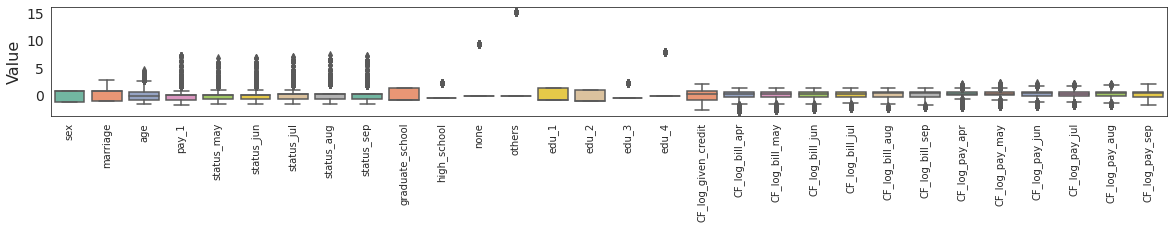

In [317]:
# Box plot using the new data set from above
plt.figure(figsize=(20,2))

ax1 = sns.boxplot(data=formatted_data_scaled, x="feature", y="value", palette = "Set2")

plt.xticks(rotation = 90)
plt.ticklabel_format(axis="y", style="plain")
ax1.set_xlabel(" ")
ax1.set_ylabel("Value", fontsize=16)
ax1.set_yticklabels(ax1.get_yticks().astype("int"), size = 14);

Correlation heatmap with the scaled data:

*   The `status_xx` have a higher correlation to the target feature than before
*   The new features after applying the `log()` transformation show high, negative correlation
*  There is still high correlation between some input features (collinearity)

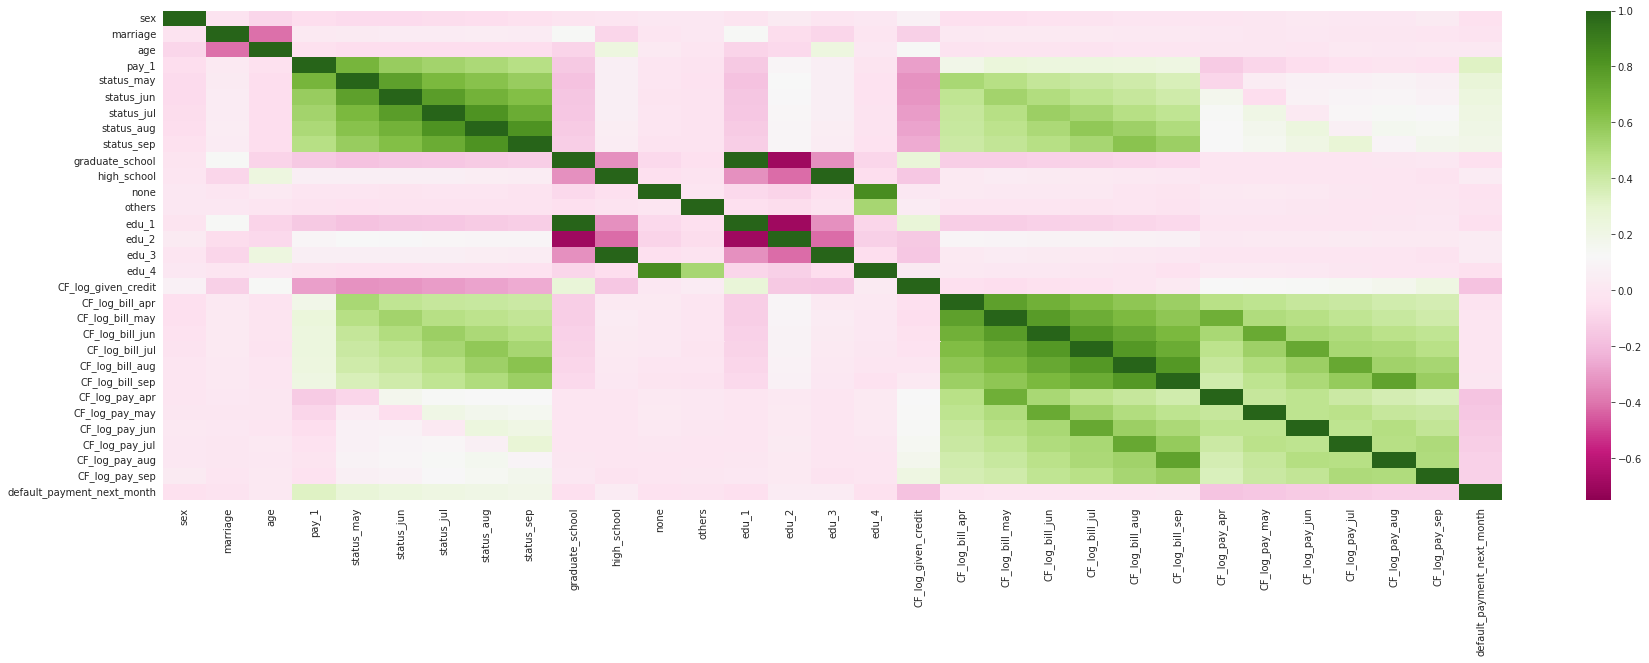

In [318]:
#heatmap with the new scaled data (same color scale as before)
plt.subplots(figsize=(30,9))
sns.heatmap(data_scaled.corr(),cmap="PiYG",annot=False, vmin=-0.75, vmax=1)
plt.show()

In [319]:
#Correlation of the features vs. the target
pd.DataFrame(data_scaled.corr()['default_payment_next_month'].sort_values(ascending=False)).transpose()

,default_payment_next_month,pay_1,status_may,status_jun,status_jul,status_aug,status_sep,high_school,edu_3,edu_2,...,edu_4,edu_1,graduate_school,CF_log_pay_aug,CF_log_pay_sep,CF_log_pay_jul,CF_log_pay_jun,CF_log_pay_may,CF_log_pay_apr,CF_log_given_credit
default_payment_next_month,1.0,0.325365,0.263649,0.238085,0.219889,0.204948,0.190182,0.035943,0.035943,0.031817,...,-0.044411,-0.049595,-0.049595,-0.109194,-0.112428,-0.123367,-0.140499,-0.151012,-0.167279,-0.174877


## 4.2 Split data: Train & Test Sets

The datset is split into **Training** and **Test** subsets with a realtion of **80% / 20%**.

In [320]:
from sklearn.model_selection import train_test_split

# First: Split 80%/20% without considering the imbalance of the target variable "defaulty_payment"
X_trainScaled, X_testScaled, Y_trainScaled, Y_testScaled = train_test_split(X_scaled, Y_scaled,
                                                                            test_size=0.2,
                                                                            shuffle = True,
                                                                            random_state = rs
                                                                            );

In [321]:
print("Size of Training set:", len(X_trainScaled))
print("Size of Test set:    ", len(X_testScaled))

Size of Training set: 21331
Size of Test set:     5333


## 4.3 Balacing the Training Set

To reach high overall **Accuracy** values and, at the same time, an acceptable **Recall** level, the models need to be trained wiht balanced data (similar amount of data for both classes defaulters and not-defaulters).



[SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) (*Synthetic Minority Over-sampling Technique*) is chosen, since the size of the original dataset is not large (30k), so under-sampling reduces too much or available data for training and lead to under-fitting issues.

This technique is **only applied to the training dataset**. The testing data remains imbalanced, reflecting the reality.

In [322]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

over_sampler = SMOTE(random_state=rs)

X_trainBal, Y_trainBal = over_sampler.fit_resample(X_trainScaled, Y_trainScaled)

print("Data added to balance the Training Set: ", (len(X_trainBal) -len(X_trainScaled)))

Data added to balance the Training Set:  11879


In [325]:
# The test data set is kept as in the original
X_testBal = X_testScaled
Y_testBal = Y_testScaled

In [326]:
#Relative frequency within the balanced train data set (Y_trainBal)
target_freq_train = (Y_trainBal.value_counts(normalize=True)*100);

In [327]:
#Relative frequency within the IMBALANCED TEST set:
target_freq_test = (Y_testBal.value_counts(normalize=True)*100);

In [328]:
print("Size of Balanced Training set: ", len(X_trainBal), ", with deafault rates frequency", round(target_freq_train[0],1), "% /", round(target_freq_train[1],1), "%")
print("Size of Test set (imbalanced): ", len(X_testBal) , " , with deafault rates frequency", round(target_freq_test[0],1), "% /", round(target_freq_test[1],1), "%")

Size of Balanced Training set:  33210 , with deafault rates frequency 50.0 % / 50.0 %
Size of Test set (imbalanced):  5333  , with deafault rates frequency 77.7 % / 22.3 %


# 5.Model Training and Testing
<a id='Modelling'></a>
In this chapter, certain machine learning models are trained and their perfomance checked.

All of them can be found among the models in [Scikit Learn](https://scikit-learn.org/stable/supervised_learning.html) for binary classification, except [XG-Boost](https://xgboost.readthedocs.io/en/stable/) and the Neural Network, built with [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

In [329]:
#Function for creating plots with models learning curves
# http://scikit-learn.org/stable/modules/learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [330]:
#Plotting confusion matrix in various forms (absolute and normalized)
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from itertools import *    

def plot_confusion_matrix_own(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    print('Confusion matrix, without normalization')
    print(cm)

    print("\n")

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    print(cm)

    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [331]:
#Plotting confusion matrix (JUST THE NORMALIZED) ---> "SIMPLE"
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from itertools import *    

def plot_confusion_matrix_simple(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 5.1 Model Metrics or Scoring
In the case dealt with here, there is a high cost for the bank when there is:
* A) Large number of **false negatives**, since no actions can be taken (**defaulters not dectected**)
* B) High **false positives** when the bank needs to **investigate** a lot of customers who probably will not default (not-defaulters being classified as defaulters).

On the other hand, as already mentioned in chapter 1.3, the target feature is **imbalanced**, so the *classical accuracy* value will not give a realistic metric of how the models are detecting defaulter.

Therefore, the **F2-Score** will be used as metric balancing Recall and Precision.
It is similar to the more known F1-Score, but overweighing more Recall than Precision. More information about the F2-Score [here](https://towardsdatascience.com/is-f1-the-appropriate-criterion-to-use-what-about-f2-f3-f-beta-4bd8ef17e285).

For those models, where the corresponding API does not allow to use the F2-Score, **recall** has been chosen as the tracking metric.

## 5.2. Base Models
The following "base" models  (mostly) from Scikit Learn are trained:


1.   Gausian Naive Bayes (*with grid search optimized hyperameter*)
2.   Gradient Boosting Classifer
3.   Support Vector Classifier
4.   Random Forest Classifier
5.   Decision Tree Classifier
6.   Logistic Regresion (*with weight class penilizing classification errors in defaulters*)
7.   Ada Boost Classifier
8.   Quadratic Discriminant Analysis
9.   Multi Layer Perceptron Classifier
10.  Ridge Classifier
11.  K-Neighbors Classifiers
12.  XG-Boosting Classifier

In [332]:
#Main needed imports for training and testing

#Usual functions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Models Scikit Learn
#https://scikit-learn.org/stable/supervised_learning.html
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


# XG-Boost
# https://xgboost.readthedocs.io/en/stable/
from xgboost import XGBClassifier


#Metrics / Scores
from sklearn.metrics import f1_score,fbeta_score, make_scorer, classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score

#F2-score
own_scorer = make_scorer(fbeta_score, beta=2);

In [333]:
base_results = pd.DataFrame();

In [334]:
####################################
#Grid search G. Naive Bayes

In [335]:
kfold = 5

In [336]:
GNB_opt = GaussianNB();

params_GNB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_GNB = GridSearchCV(estimator=GNB_opt,
                      param_grid=params_GNB,
                      cv=kfold,
                      scoring=own_scorer,
                      verbose=0);

gs_GNB.fit(X_trainBal, Y_trainBal);

In [337]:
# Execution on the whole model
# "gs": Grid Seatch Parameters

GNB_gs = GaussianNB(var_smoothing = gs_GNB.best_params_["var_smoothing"])

GNB_gs.fit(X_trainBal, Y_trainBal)

Ypred_GNB_gs = GNB_gs.predict(X_testBal)


results = [['GaussianNB',
      round(fbeta_score(y_pred = Ypred_GNB_gs, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_GNB_gs, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_GNB_gs, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_GNB_gs, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [338]:
####################################
#Gradient Boosting Classifier

In [339]:
# Execution on the whole data set
# "O": Default parameters

GBC_0 = GradientBoostingClassifier(random_state = rs)

GBC_0.fit(X_trainBal, Y_trainBal);

Ypred_GBC_0 = GBC_0.predict(X_testBal);

results = [['GradientBoostingClassifier',
      round(fbeta_score(y_pred = Ypred_GBC_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_GBC_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_GBC_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_GBC_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [340]:
####################################
#Random Forest  - deafult parameters

In [341]:
# Execution on the whole data set
# "O": Default parameters

RF_0 = RandomForestClassifier(class_weight={0: 0.99, 1: 0.01}, random_state = rs)

RF_0.fit(X_trainBal, Y_trainBal);

Ypred_RF_0 = RF_0.predict(X_testBal);

results = [['RandomForestClassifier',
      round(fbeta_score(y_pred = Ypred_RF_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_RF_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_RF_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_RF_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [342]:
####################################
#Decision Tree Classifier  - deafult parameters

In [343]:
 # Execution on the whole data set
# "O": Default parameters

DTC_0 =  DecisionTreeClassifier(random_state = rs)

DTC_0.fit(X_trainBal, Y_trainBal);

Ypred_DTC_0 = DTC_0.predict(X_testBal);


results = [['DecisionTreeClassifier',
      round(fbeta_score(y_pred = Ypred_DTC_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_DTC_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_DTC_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_DTC_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [344]:
####################################
#Logistic Regression  - class weighted to penalize errors in deault=1 category
# ==> higher recall, but lower overall accuracy

In [345]:
# Execution on the whole data set
# "O": Default parameters

LR_0 =  LogisticRegression(class_weight={0:1, 1:1.1}, random_state = rs)

LR_0.fit(X_trainBal, Y_trainBal)

Ypred_LR_0 = LR_0.predict(X_testBal)

results = [['LogisticRegression',
      round(fbeta_score(y_pred = Ypred_LR_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_LR_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_LR_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_LR_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [346]:
####################################
#Ada-Boost Classifier  - default parameters

In [347]:
# Execution on the whole data set
# "O": Default parameters

ABC_0 =  AdaBoostClassifier(n_estimators=50, random_state = rs)

ABC_0.fit(X_trainBal, Y_trainBal);

Ypred_ABC_0 = ABC_0.predict(X_testBal)

results = [['AdaBoostClassifier',
      round(fbeta_score(y_pred = Ypred_ABC_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_ABC_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_ABC_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_ABC_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [348]:
####################################
#Quadratic Discriminant Analysis  - default parameters

In [349]:
# Execution on the whole data set
# "O": Default parameters

QDA_0 =  QuadraticDiscriminantAnalysis()

QDA_0.fit(X_trainBal, Y_trainBal);

Ypred_QDA_0 = QDA_0.predict(X_testBal)

results = [['QuadraticDiscriminantAnalysis',
      round(fbeta_score(y_pred = Ypred_QDA_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_QDA_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_QDA_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_QDA_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [350]:
####################################
#Multiple Layer Perceptron, default hyper-parameters
# Neural netwrok from Scikit Learn

# Execution on the whole data set
# "O": Default parameters

MLP_0 =  MLPClassifier(random_state = rs)

MLP_0.fit(X_trainBal, Y_trainBal);

Ypred_MLP_0 = MLP_0.predict(X_testBal)


results = [['MLPClassifier',
      round(fbeta_score(y_pred = Ypred_MLP_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_MLP_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_MLP_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_MLP_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [351]:
####################################
#Ridge Classifier, default hyper-parameters

# Execution on the whole data set
# "O": Default parameters

Ridge_0 =  RidgeClassifier(random_state = rs)

Ridge_0.fit(X_trainBal, Y_trainBal);

Ypred_Ridge_0 = Ridge_0.predict(X_testBal)


results = [['RidgeClassifier',
      round(fbeta_score(y_pred = Ypred_Ridge_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_Ridge_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_Ridge_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_Ridge_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results)

In [352]:
####################################
#SVC, default hyper-parameters

# Execution on the whole data set
# "O": Default parameters

SVC_0 =  SVC(random_state = rs)

SVC_0.fit(X_trainBal, Y_trainBal)

Ypred_SVC_0 = SVC_0.predict(X_testBal)

results = [['SVC',
      round(fbeta_score(y_pred = Ypred_SVC_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_SVC_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_SVC_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_SVC_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [353]:
####################################
#KN-Neighbours, default hyper-parameters

# Execution on the whole data set
# "O": Default parameters

KNN_0 =  KNeighborsClassifier()

KNN_0.fit(X_trainBal, Y_trainBal);

Ypred_KNN_0 = KNN_0.predict(X_testBal)

results = [['KNN',
      round(fbeta_score(y_pred = Ypred_KNN_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_KNN_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_KNN_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_KNN_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

In [354]:
####################################
#XG-Boost, Grid Search hyper-parameters

# Execution on the whole data set
# "O": Default parameters

XGB_0 =  XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.05,
                       max_depth = 5, alpha = 2, n_estimators = 100,
                       random_state = rs)

XGB_0.fit(X_trainBal, Y_trainBal);

Ypred_XGB_0 = XGB_0.predict(X_testBal)

results = [['XGBClassifier',
      round(fbeta_score(y_pred = Ypred_XGB_0, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Ypred_XGB_0, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Ypred_XGB_0, y_true = Y_testBal),2),
      round(f1_score(y_pred = Ypred_XGB_0, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results);

## 5.3 Custom Neural Network
Additionally to the "base models" a own-configured Neural Network with Tensor Flow is bulit and trained:

In [355]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [356]:
#Function for plotting the loss and accuracy over the epochs during training+validation
def show_loss_accuracy_evolution(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 3))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['Accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_Accuracy'], label = 'Val Accuracy')
    plt.ylim([0.3, 1])
    ax2.grid()
    ax2.legend()

    plt.show()

In [357]:
#Function for plotting the loss and RECALL over the epochs during training+validation
def show_loss_recall_evolution(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 3))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Recall')
    ax2.plot(hist['epoch'], hist['recall'], label='Train Recall')
    ax2.plot(hist['epoch'], hist['val_recall'], label = 'Val Recall')
    plt.ylim([0.3, 1])
    ax2.grid()
    ax2.legend()

    plt.show()

In [358]:
#Defining the inputs for the Neural Network as the amount of features
#This is useful during feature engineeing if number of varibales is being changed frequently
from numpy.core.fromnumeric import shape
input_shape = shape(X_trainBal)

In [359]:
#Defining the Neural Network

tf.random.set_seed(rs)

model_NN = keras.Sequential()

model_NN.add(layers.Dense(512, input_shape=(input_shape[1],), activation='relu'))
model_NN.add(layers.Dropout(0.2))
model_NN.add(layers.BatchNormalization())

model_NN.add(layers.Dense(512, activation='relu'))
model_NN.add(layers.Dropout(0.2))
model_NN.add(layers.BatchNormalization())
model_NN.add(layers.Dense(512, activation='relu'))
model_NN.add(layers.Dropout(0.2))
model_NN.add(layers.BatchNormalization())

model_NN.add(layers.Dense(1, activation='sigmoid'))

          
## model summary
model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [360]:
# Compile model
model_NN.compile(loss='binary_crossentropy',
              optimizer= keras.optimizers.Adam(1e-7), 
              metrics=['Recall']);

#Early stopper
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_recall', patience=100)

#Training the model
history_NN = model_NN.fit(X_trainBal, Y_trainBal,
                 epochs=50,
                 validation_split=0.2,
                 batch_size=128,
                 #callbacks = [callback],
                 shuffle=True,
                 verbose=0);

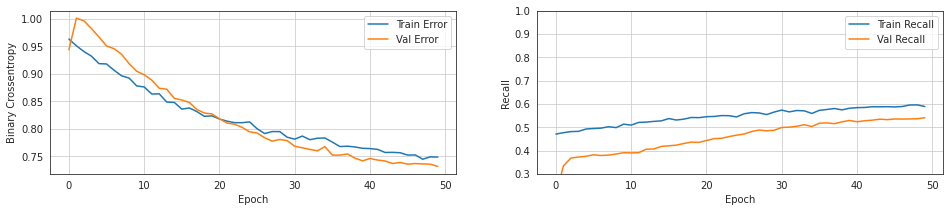

In [361]:
show_loss_recall_evolution(history_NN)

In [362]:
predictions_NN = pd.DataFrame(model_NN.predict(X_testBal))

Y_pred_NN = tf.round(predictions_NN)


results = [['Custom_NeuralNetwork',
      round(fbeta_score(y_pred = Y_pred_NN, y_true = Y_testBal, beta=2),2),
      round(recall_score(y_pred = Y_pred_NN, y_true = Y_testBal),2),
      round(accuracy_score(y_pred = Y_pred_NN, y_true = Y_testBal),2),
      round(f1_score(y_pred = Y_pred_NN, y_true = Y_testBal),2)
      ]]
  
base_results = base_results.append(results)

167/167 [==============================] - 0s 2ms/step


In [363]:
# Defining the column names for the summary dataframe
columns = ["Model", "F2-Score", "Recall","Accuracy", "F1-Score"]

In [364]:
# Adding the column names
base_results.columns = columns

#Printing the results sorted by F2-Score:
base_results.sort_values(by = "F2-Score", ascending=False)

,Model,F2-Score,Recall,Accuracy,F1-Score
0,GaussianNB,0.61,0.73,0.65,0.48
0,LogisticRegression,0.58,0.65,0.70,0.49
0,MLPClassifier,0.57,0.65,0.69,0.48
0,RidgeClassifier,0.57,0.62,0.73,0.51
0,QuadraticDiscriminantAnalysis,0.56,0.68,0.63,0.45
0,SVC,0.56,0.60,0.76,0.52
0,RandomForestClassifier,0.53,0.53,0.78,0.52
0,AdaBoostClassifier,0.53,0.54,0.77,0.51
0,KNN,0.53,0.61,0.66,0.44
0,XGBClassifier,0.52,0.51,0.80,0.53


## 5.4 Scores & Confusion Matrixes

In [ ]:
classifiers = [GaussianNB(var_smoothing = gs_GNB.best_params_["var_smoothing"]), 
               GradientBoostingClassifier(random_state = rs), 
               SVC(random_state = rs),
               RandomForestClassifier(class_weight={0: 0.99, 1: 0.01}, random_state = rs),
               DecisionTreeClassifier(random_state = rs),
               LogisticRegression(class_weight={0:1, 1:1.1}, random_state = rs),
               AdaBoostClassifier(n_estimators=50, random_state = rs),
               QuadraticDiscriminantAnalysis(),
               MLPClassifier(random_state = rs),
               RidgeClassifier(random_state = rs),
               KNeighborsClassifier(),
               XGBClassifier(random_state = rs)               
               ]
for cls in classifiers:
    cls.fit(X_trainBal, Y_trainBal);

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,8))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_testBal, 
                          Y_testBal, 
                          ax=ax, 
                          cmap='Blues',
                          normalize = "true",
                          colorbar  = False)
    ax.set_title(type(cls).__name__, fontsize=15)
    ax.set_xlabel("Predicted Label", fontsize = 12)
    ax.set_ylabel("True Label", fontsize = 12)


        
plt.tight_layout()  
plt.show()

## 5.5. ROC curves
The ROC curves also show the poor performance of all classifiers, espcially the Decision Tree Classfier.
Best models: XGBoost and Gradient Boosting (both also with the higher F1-Score in the table above).

In [ ]:
from sklearn import metrics
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(15,4))

#Base Naive Bayes
pred_GNB = GNB_gs.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_GNB)
auc = round(metrics.roc_auc_score(Y_testBal, pred_GNB), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

# Gradient Boosting Base
pred_GBC = GBC_0.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_GBC)
auc = round(metrics.roc_auc_score(Y_testBal, pred_GBC), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))


# Random Forest
pred_RF = RF_0.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_RF)
auc = round(metrics.roc_auc_score(Y_testBal, pred_RF), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


# Decision Tree Classifier
pred_DTC = DTC_0.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_DTC)
auc = round(metrics.roc_auc_score(Y_testBal, pred_DTC), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

# Logistic Regression
pred_LR = LR_0.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_LR)
auc = round(metrics.roc_auc_score(Y_testBal, pred_LR), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# Ada Boosting
pred_ABC = ABC_0.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_ABC)
auc = round(metrics.roc_auc_score(Y_testBal, pred_ABC), 4)
plt.plot(fpr,tpr,label="Ada Boosting, AUC="+str(auc))

# Quadratic Discriminant Analysis
pred_QDA = QDA_0.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_QDA)
auc = round(metrics.roc_auc_score(Y_testBal, pred_QDA), 4)
plt.plot(fpr,tpr,label="Quadratic Discriminant Analysis, AUC="+str(auc))

# Ridge Classifier
pred_ridge = Ridge_0.decision_function(X_testBal)
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_ridge)
auc = round(metrics.roc_auc_score(Y_testBal, pred_ridge), 4)
plt.plot(fpr,tpr,label="Ridge Classifier, AUC="+str(auc))

# XG-Boost
pred_XGB = XGB_0.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_XGB)
auc = round(metrics.roc_auc_score(Y_testBal, pred_XGB), 4)
plt.plot(fpr,tpr,label="XG-Boost, AUC="+str(auc))

# Multi-layer Perceptron
pred_MLP = MLP_0.predict_proba(X_testBal)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_MLP)
auc = round(metrics.roc_auc_score(Y_testBal, pred_MLP), 4)
plt.plot(fpr,tpr,label="Multi-layer Perceptron, AUC="+str(auc))


# Neural Network (TensorFlow)
pred_NN = model_NN.predict(X_testBal).ravel()
fpr, tpr, _ = metrics.roc_curve(Y_testBal, pred_NN)
auc = round(metrics.roc_auc_score(Y_testBal, pred_NN), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))

# Straight line (random guessing line)
plt.plot([0, 1], [0, 1], 'k--')


plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel('False positive rate (1-Precision)', size=14)
plt.ylabel('True positive rate (Recall)', size=14)
plt.title('ROC curves', size=18)
plt.legend(loc='best');

## 5.6 Voting Clasfier (Base Models)
A new dataset is built with the predictions for each observation of every model trained in the previous chapter. `voting` is the mean prediction value of all models and is used as the output of this model.

The performance is not much better than those of the single models:

In [ ]:
X_testBal = X_testBal.reset_index()
X_testBal = X_testBal.drop(columns = "index", axis=1)

In [ ]:
Y_testBal = Y_testBal.reset_index()
Y_testBal = Y_testBal.drop(columns = "index", axis=1)

In [ ]:
# Data frame where predictions form the trained models are saved
Y_pred_ensemble = pd.DataFrame()

#Guassian Naiva Bayes1
Y_pred_ensemble["NB1"] = GNB_gs.predict(X_testBal)


#Gradient Boosting
Y_pred_ensemble["GB"] = GBC_0.predict(X_testBal)

#Random Forest
Y_pred_ensemble["RF"] = RF_0.predict(X_testBal)

#Decision Tree Classifier
Y_pred_ensemble["DTC"] = DTC_0.predict(X_testBal)

#Logistic Regression
Y_pred_ensemble["LR"] = LR_0.predict(X_testBal)

#Ada Boost Classifier
ABC_0
Y_pred_ensemble["ABC"] = ABC_0.predict(X_testBal)

#Quadratic Discriminant Analysis
Y_pred_ensemble["QDA"] = QDA_0.predict(X_testBal)

#MLP
Y_pred_ensemble["MLP"] = MLP_0.predict(X_testBal)


#Ridge Classifier
Y_pred_ensemble["Ridge"] = Ridge_0.predict(X_testBal)

#SVC
Y_pred_ensemble["SVC"] = SVC_0.predict(X_testBal)

#KNN
Y_pred_ensemble["KNN"] = KNN_0.predict(X_testBal)

#XG Boost Classifier
Y_pred_ensemble["XGB"] = XGB_0.predict(X_testBal)

# Neural Network
Y_pred_ensemble["NN1"] = model_NN.predict(X_testBal)
Y_pred_ensemble["NN1"] = Y_pred_ensemble["NN1"].apply( lambda x: round(x));



In [ ]:
#The voting result is the mean of all predictions in that row
#This can be done since we are dealing with a binary classification
Y_pred_ensemble["Voting"] = round(Y_pred_ensemble.mean(numeric_only=True, axis=1),0)

#The target value is added as new column
Y_pred_ensemble["Actual"] = Y_testBal["default_payment"]

#Having a look at the voting vs. the actual target value
Y_pred_ensemble.head(3)

In [ ]:
plot_confusion_matrix_simple(confusion_matrix(y_pred = Y_pred_ensemble["Voting"], y_true = Y_pred_ensemble["Actual"]),
                             classes=(0,1), normalize=True)

# 6."Meta-Dataset" and "Meta-Model"
<a id='Meta'></a>

Based on the same idea as in the voting classifer in the previous chapter, a new dataset is built containing these **predicitions** of the already trained models *("meta-dataset")* as **input features for new models** *("meta-models")*.
Each model from the previous chapter generates a prediction for each row of the original data set. 

The tagert feature remains `default_payment`.

In [ ]:
# Data frame where predictions form the trained models are saved
data_predicted = pd.DataFrame()

#Guassian Naiva Bayes1
data_predicted["NB"] = GNB_gs.predict(X_scaled)


#Gradient Boosting1
data_predicted["GB"] = GBC_0.predict(X_scaled)


#Random Forest
data_predicted["RF"] = RF_0.predict(X_scaled)

#Decision Tree Classifier
data_predicted["DTC"] = DTC_0.predict(X_scaled)

#Logistic Regression1
data_predicted["LR"] = LR_0.predict(X_scaled)

#Ada Boost Classifier
data_predicted["ABC"] = ABC_0.predict(X_scaled)

#Quadratic Discriminant Analysis
data_predicted["QDA"] = QDA_0.predict(X_scaled)

#MLP
data_predicted["MLP"] = MLP_0.predict(X_scaled)

#Ridge Classifier
data_predicted["Ridge"] = Ridge_0.predict(X_scaled)

#SVC
data_predicted["SVC"] = SVC_0.predict(X_scaled)

#KNN
data_predicted["KNN"] = KNN_0.predict(X_scaled)

#XG Boost
data_predicted["XGB"] = XGB_0.predict(X_scaled)


# Neural Network
data_predicted["NN"] = model_NN.predict(X_scaled)
data_predicted["NN"] = data_predicted["NN"].apply( lambda x: round(x));


In [ ]:
data_predicted.head(3)

In [ ]:
# Dimensions of our data frame
print("Number of columns (classifiers)            :   ", np.shape(data_predicted)[1])
print("Number of rows (as in the original dataset):   ", np.shape(data_predicted)[0])

In [ ]:
# Separating into input data and target variables

#Eliminating the target column from the input data
X = data_predicted

# Target varibale as independent dataframe
Y = Y_scaled;

In [ ]:
#Spliting into train and test
X_trainMeta, X_testMeta, Y_trainMeta, Y_testMeta = train_test_split(X, Y,
                                                                   test_size=0.2,
                                                                   shuffle = True,
                                                                   #random_state = rs
                                                                    );

A voting system will be built as the final model.

## 6.1. Balancing meta-dataset with SMOTE
The dataset is still imbalanced, so it's proceeded as before: applying SMOTE oversampling  to the Training  data, after splitting from Test data, which reamains imbalanced:

In [ ]:
over_sampler = SMOTE(random_state = rs)

X_trainMeta, Y_trainMeta = over_sampler.fit_resample(X_trainMeta, Y_trainMeta);

#print("Size of the balanced Train Meta-DataSet:", len(X_trainMeta), "(same size as in the prev. chapter)")

## 6.2."Model" Importance

The selected models to be trained and tested are based on the feature importance of an XG-Boost model trained with the meta-data:

In [ ]:
import xgboost
model_imp = XGBClassifier(random_state = rs)
# fit the model
model_imp.fit(X_trainMeta, Y_trainMeta);

# Plot importance of features (F-Score)
fig = plt.figure(figsize = (15,5) );
xgboost.plot_importance(model_imp);
#plt.rcParams['figure.figsize'] = [15, 3]
plt.show();


Tge Top 5 models from above are chosen, additionally 2 very powerful models: XG-Boost and a Custom Neural Network, optmized for this new dataset.

Decision Tree Classifier (DTC) has been discarded for the meta-data after consistently performing poorly compared to the rest.

In [ ]:
###########
# Training the top base models

In [ ]:
base_meta_results = pd.DataFrame()

In [ ]:
# 1)  Random Forest
RF_meta =  RandomForestClassifier(random_state = rs)

RF_meta.fit(X_trainMeta, Y_trainMeta)

Ypred_RF_meta= RF_meta.predict(X_testMeta)

results = [['meta_RandomForest',
      round(fbeta_score(y_pred = Ypred_RF_meta, y_true = Y_testMeta, beta=2),3),
      round(recall_score(y_pred = Ypred_RF_meta, y_true = Y_testMeta),3),
      round(accuracy_score(y_pred = Ypred_RF_meta, y_true = Y_testMeta),3),
      round(f1_score(y_pred = Ypred_RF_meta, y_true = Y_testMeta),3)
      ]]
  
base_meta_results = base_meta_results.append(results)

In [ ]:
# 2)  KNN
KNN_meta =  KNeighborsClassifier()  

KNN_meta.fit(X_trainMeta, Y_trainMeta)

Ypred_KNN_meta= KNN_meta.predict(X_testMeta)

results = [['meta_KNN',
      round(fbeta_score(y_pred = Ypred_KNN_meta, y_true = Y_testMeta, beta=2),3),
      round(recall_score(y_pred = Ypred_KNN_meta, y_true = Y_testMeta),3),
      round(accuracy_score(y_pred = Ypred_KNN_meta, y_true = Y_testMeta),3),
      round(f1_score(y_pred = Ypred_KNN_meta, y_true = Y_testMeta),3)
      ]]
  
base_meta_results = base_meta_results.append(results)

In [ ]:
# 3)  Multi Layer Perceptron
MLP_meta =  MLPClassifier(random_state = rs)

MLP_meta.fit(X_trainMeta, Y_trainMeta)

Ypred_MLP_meta= KNN_meta.predict(X_testMeta)

results = [['meta_MLP',
      round(fbeta_score(y_pred = Ypred_MLP_meta, y_true = Y_testMeta, beta=2),3),
      round(recall_score(y_pred = Ypred_MLP_meta, y_true = Y_testMeta),3),
      round(accuracy_score(y_pred = Ypred_MLP_meta, y_true = Y_testMeta),3),
      round(f1_score(y_pred = Ypred_MLP_meta, y_true = Y_testMeta),3)
      ]]
  
base_meta_results = base_meta_results.append(results)

In [ ]:
# 4)  Ridge
ridge_meta =  RidgeClassifier(random_state = rs)

ridge_meta.fit(X_trainMeta, Y_trainMeta)

Ypred_ridge_meta= ridge_meta.predict(X_testMeta)

results = [['meta_MLP',
      round(fbeta_score(y_pred = Ypred_ridge_meta, y_true = Y_testMeta, beta=2),3),
      round(recall_score(y_pred = Ypred_ridge_meta, y_true = Y_testMeta),3),
      round(accuracy_score(y_pred = Ypred_ridge_meta, y_true = Y_testMeta),3),
      round(f1_score(y_pred = Ypred_ridge_meta, y_true = Y_testMeta),3)
      ]]
  
base_meta_results = base_meta_results.append(results)

In [ ]:
# 5)  Gradient Boosting
GBC_meta =  GradientBoostingClassifier(random_state = rs)

GBC_meta.fit(X_trainMeta, Y_trainMeta)

Ypred_GBC_meta= GBC_meta.predict(X_testMeta)

results = [['meta_MLP',
      round(fbeta_score(y_pred = Ypred_GBC_meta, y_true = Y_testMeta, beta=2),3),
      round(recall_score(y_pred = Ypred_GBC_meta, y_true = Y_testMeta),3),
      round(accuracy_score(y_pred = Ypred_GBC_meta, y_true = Y_testMeta),3),
      round(f1_score(y_pred = Ypred_GBC_meta, y_true = Y_testMeta),3)
      ]]
  

In [ ]:
# 6) XG-Boost

XGB_meta =  XGBClassifier(random_state = rs);

XGB_meta.fit(X_trainMeta, Y_trainMeta);

Ypred_XGB_meta= XGB_meta.predict(X_testMeta)

results = [['meta_XGBoost',
      round(fbeta_score(y_pred = Ypred_XGB_meta, y_true = Y_testMeta, beta=2),3),
      round(recall_score(y_pred = Ypred_XGB_meta, y_true = Y_testMeta),3),
      round(accuracy_score(y_pred = Ypred_XGB_meta, y_true = Y_testMeta),3),
      round(f1_score(y_pred = Ypred_XGB_meta, y_true = Y_testMeta),3)
      ]]
  
base_meta_results = base_meta_results.append(results)

**Neural Network on the meta-dataset**

The same neural network  as in the previous chapter is used.
The learning curves show again, the uncommon behaviour of the validation scoring better than the train data. There is a slight **overfitting** (especially in the loss curve), but the best results with the Test data have been achieved when training longer the model.

In [ ]:
# Automatic caulcalating the size of the inputs in the NN,
#so that it doesn't have to be introduced manully again if the features number vary
from numpy.core.fromnumeric import shape

input_shape = shape(X_trainMeta)

In [ ]:
#Same Neural Network as before

tf.random.set_seed(rs)

model_NNmeta = keras.Sequential()

model_NNmeta.add(layers.Dense(512, input_shape=(input_shape[1],), activation='relu'))
model_NNmeta.add(layers.Dropout(0.2))
model_NNmeta.add(layers.BatchNormalization())

model_NNmeta.add(layers.Dense(512, activation='relu'))
model_NNmeta.add(layers.Dropout(0.2))
model_NNmeta.add(layers.BatchNormalization())
model_NNmeta.add(layers.Dense(512, activation='relu'))
model_NNmeta.add(layers.Dropout(0.2))
model_NNmeta.add(layers.BatchNormalization())

model_NNmeta.add(layers.Dense(1, activation='sigmoid'))

          
## model summary
#model_NNmeta.summary();

In [ ]:
# Compile model
model_NNmeta.compile(loss='binary_crossentropy',
              optimizer= keras.optimizers.Adam(1e-7), 
              metrics=['Accuracy']);

#Early stopper
callback = EarlyStopping(monitor='val_loss', patience=25, mode='min')

#Training the model
history_NNmeta = model_NNmeta.fit(X_trainMeta, Y_trainMeta,
                 epochs=400,
                 validation_split=0.2,
                 batch_size=256,
                 #callbacks = [callback],
                 shuffle=True,
                 verbose=0);

In [ ]:
show_loss_accuracy_evolution(history_NNmeta)

In [ ]:
predictions_NNmeta = pd.DataFrame(model_NNmeta.predict(X_testMeta))

Y_pred_NNmeta = tf.round(predictions_NNmeta)


results = [['meta_customNN',
      round(fbeta_score(y_pred = Y_pred_NNmeta, y_true = Y_testMeta, beta=2),3),
      round(recall_score(y_pred = Y_pred_NNmeta, y_true = Y_testMeta),3),
      round(accuracy_score(y_pred = Y_pred_NNmeta, y_true = Y_testMeta),3),
      round(f1_score(y_pred = Y_pred_NNmeta, y_true = Y_testMeta),3)
      ]]
  
base_meta_results = base_meta_results.append(results)

**Scores** of the chosen meta-models (incl. the custom NN from above):

In [ ]:
columns_meta = ["Model", "F2-Score", "Recall","Accuracy", "F1-Score"]

base_meta_results.columns = columns_meta
base_meta_results

In [ ]:
classifiers = [ 
               RandomForestClassifier(random_state =rs), 
               KNeighborsClassifier(),
               MLPClassifier(random_state =rs),
               RidgeClassifier(random_state =rs),
               GradientBoostingClassifier(random_state =rs),
               XGBClassifier(random_state =rs)
               ]
for cls in classifiers:
    cls.fit(X_trainMeta, Y_trainMeta);

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,12) )

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_testMeta, 
                          Y_testMeta, 
                          ax=ax, 
                          cmap='Blues',
                          normalize = "true",
                          colorbar  = False)
    ax.set_title(type(cls).__name__, fontsize=15)
    ax.set_xlabel("Predicted Label", fontsize = 12)
    ax.set_ylabel("True Label", fontsize = 12)


        
plt.tight_layout()  
plt.show()

In [ ]:
print("Custom Neural Network")
plot_confusion_matrix_simple(confusion_matrix(y_pred=Y_pred_NNmeta, y_true=Y_testMeta),
                      classes=(0,1),
                      normalize=True)

Performance scores are considerable better than with the original data and similar in all tested models.

## 6.3. Voting Classifier (Meta Models)
It is procreeded the same way as in the prev. chapter.
Additionally, there are extra calculations and features


*   `agreement` takes the value "Yes" if all meta-models predicted the same output. It enables to predict on how often they "agreed".

In [ ]:
data_predicted2 = pd.DataFrame()

#1Random Forest
data_predicted2["RF"] = RF_meta.predict(X_testMeta)

# 2KNN
data_predicted2["KNN"] = KNN_meta.predict(X_testMeta)

# 3MLP
data_predicted2["MLP"] = MLP_meta.predict(X_testMeta)

#4 XGBoost
data_predicted2["XGB"] = XGB_meta.predict(X_testMeta)


# 5Neural Network
data_predicted2["NN"] = tf.round(model_NNmeta.predict(X_testMeta))


#New column with agreement
data_predicted2["agreement"] = "No"
#Agreement takes the value "Yes" if all voters have the same value:
data_predicted2.loc[( (data_predicted2.RF == data_predicted2.KNN) & (data_predicted2.RF == data_predicted2.MLP) & (data_predicted2.RF == data_predicted2.XGB) & (data_predicted2.RF == data_predicted2.NN) ), "agreement"] = "Yes"

#data_predicted2.head()

In [ ]:
#Relative frequency of agreement result
target_freq = (data_predicted2["agreement"].value_counts(normalize=True)*100)
print("Agreement:", round(target_freq[0],1), "%")
print("Disagree:", round(target_freq[1],1), "%")

In [ ]:
#Show rows where there is no agreement

disagree = data_predicted2.agreement == "No"

disagree = data_predicted2[disagree]

disagree;

*   The feature `voting` represents the rounded mean of all predictions (as in the chapter before).

*   `voting_threshold` is also a mean calculation but with a threshold value for rounding. In this case all means >0, are rounded to "1". 
This threshold can be varied  to give **Recall** more importance.


In [ ]:
#Voting is the result / mean of each model:
data_predicted2["voting"] = round(data_predicted2.mean(numeric_only=True, axis=1),0).astype("int")

#Another variable
threshold = 0.0
data_predicted2["mean"] = (data_predicted2["RF"] + data_predicted2["KNN"] + data_predicted2["MLP"] + data_predicted2["XGB"] + data_predicted2["NN"])/5
data_predicted2["voting_thr"] = 0
data_predicted2.loc[( data_predicted2["mean"] >threshold), 'voting_thr']= 1
data_predicted2["voting_thr"].astype("int");


#data_predicted2.head()

In [ ]:
real = pd.DataFrame()
real = pd.DataFrame(Y_testMeta)
real = real.reset_index()


real2 = pd.DataFrame(real["default_payment"])

data_predicted2["default_payment"] = real2["default_payment"]

In [ ]:
meta_voter_results = pd.DataFrame()

In [ ]:
#Results of voting
results = [['meta_voter',
      round(fbeta_score(y_pred = data_predicted2["voting"], y_true = data_predicted2["default_payment"], beta=2),3),
      round(recall_score(y_pred = data_predicted2["voting"], y_true = data_predicted2["default_payment"]),3),
      round(accuracy_score(y_pred = data_predicted2["voting"], y_true = data_predicted2["default_payment"]),3),
      round(f1_score(y_pred = data_predicted2["voting"], y_true = data_predicted2["default_payment"]),3)
      ]]
  
meta_voter_results = meta_voter_results.append(results)

In [ ]:
#Results of voting with thesold
results = [['meta_voter_threshold',
      round(fbeta_score(y_pred = data_predicted2["voting_thr"], y_true = data_predicted2["default_payment"], beta=2),3),
      round(recall_score(y_pred = data_predicted2["voting_thr"], y_true = data_predicted2["default_payment"]),3),
      round(accuracy_score(y_pred = data_predicted2["voting_thr"], y_true = data_predicted2["default_payment"]),3),
      round(f1_score(y_pred = data_predicted2["voting_thr"], y_true = data_predicted2["default_payment"]),3)
      ]]
  
meta_voter_results = meta_voter_results.append(results)


In [ ]:
meta_voter_results.columns = columns
meta_voter_results

In [ ]:
plot_confusion_matrix_simple(confusion_matrix(y_pred=data_predicted2["voting"], y_true=data_predicted2["default_payment"]),
                      classes=(0,1),
                      normalize=True,
                      title = "Meta Voter")

In [ ]:
plot_confusion_matrix_simple(confusion_matrix(y_pred=data_predicted2["voting_thr"], y_true=data_predicted2["default_payment"]),
                      classes=(0,1),
                      normalize=True,
                      title = "Meta Voter Threshold>0")

The differences are minimal, so it is decided to keep the **meta_voter** as the **final predictor**.

## 6.4. Analysis of failed predictions
Results are devided between succesful and failed predicitons. It is clear that voters disagree considerably more when the prediction ends up beig wrong:

In [ ]:
data_predicted2["success"] = "NOK"

data_predicted2.loc[( data_predicted2["voting"] == data_predicted2["default_payment"] ), 'success']= "OK"
#data_predicted2.head()

In [ ]:
#Porportion table for
cross_tab_prop = pd.crosstab(index=data_predicted2["success"],
                             columns=data_predicted2['agreement'],
                             normalize="index")
fig, ax1 = plt.subplots(1,1, figsize=(15, 3))

#Right plot: porportion for each category
cross_tab_prop.plot(ax=ax1, kind='bar', 
                    stacked=True, 
                    #color=sns.color_palette('Set1')
                    color=("#e41a1c", "#4daf4a")
                   )
for bar in ax1.patches:
    ax1.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y()-0.0,
      # This is actual value we'll show.
      round(bar.get_height(),2),
      # Center the labels and style them a bit.
      ha='center',weight='bold',
      size=12
  )
#ax1.get_legend().remove()
plt.xlabel("Prediciton Success")
plt.ylabel(" Agreement %");

Anlazing the wrong (NOK) predictions (left bar in the chart above):
*   Little can be done on those where every voter has failed (agreement = Yes)
*   Having a look at the **mean voting value** for those where the voter did NOT agree:



In [ ]:
data_predicted2["voting_thr"] = "0"

data_predicted2.loc[( data_predicted2["voting"] == data_predicted2["default_payment"] ), 'success']= "OK"

In [ ]:
wrong_predictions = data_predicted2[data_predicted2["success"] == "NOK"]

In [ ]:
#Relative frequency of agreement result
wrong_predictions["success"].value_counts(normalize=True)*100;

In [ ]:
wrong_predictions_dis = wrong_predictions[wrong_predictions["agreement"] == "No"]
#wrong_predictions_dis.head(5)

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize= (15,3))
sns.set_style('white')
sns.histplot(data=wrong_predictions, x="mean", hue="default_payment", shrink=.8, element="step" ,
             multiple = 'stack', palette="Set2", bins = 10);

Most of these cases have a mean voting value close to the opposite of the actual value (most of the default = 1 values have a mean close to "0").

Playing with the thserhold value can make predicting these values correctly, sacrifying those of the other category.

# 7.Summary
<a id='Conclusions'></a>

The project can summarized in 5 steps:

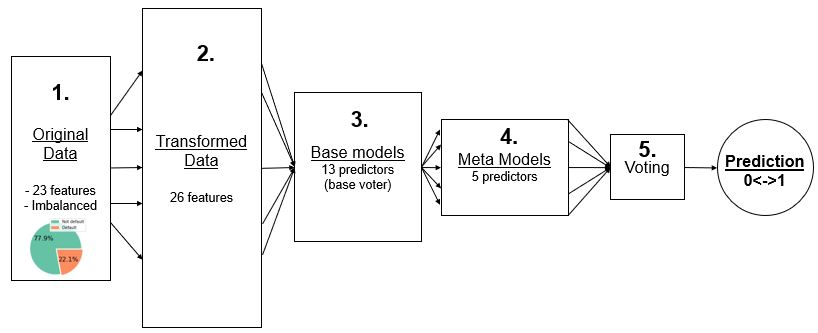

**1.**The dataset consists of **24 input features** and the binary target of `default_payment_next_month`, with 30k observations.

The target feature is **imbalanced (78% / 22%) and this handicaps the prediction perfomance of the clients that committ default.



**2.**Several cleaning and transformatios have been applied to the original dataset, as well as creating new features to imnprove the prediction performance: Check the correlation heatmaps before and after:


In [ ]:
#Heatmap of the data before and after the transformations

#Correlation matrix - ORIGINAL DATA
plt.subplots(figsize=(10,5))
sns.heatmap(round(data_clean.corr(),2), cmap='PiYG', vmin=-0.75, vmax=1)


#Correlation matrix - TRANSFORMED DATA
plt.subplots(figsize=(12,6))
sns.heatmap(data_scaled.corr(),cmap="PiYG",annot=False, vmin=-0.75, vmax=1);

**3.**Base models achieve poor prediction performance, but are used to create a new dataset. This new dataset is used as an input for other ("meta") models

**4.**These meta-models achieve signigicant improvement in all considered scores

**5.**The final prediction comes from letting the meta models vote.

In [ ]:
#Results comparison
results_comp = pd.DataFrame()
columns = ["Model", "F2-Score", "Recall","Accuracy", "F1-Score"]

# Base voter
results = [['Base Models Voter',
      round(fbeta_score(y_pred = Y_pred_ensemble["Voting"], y_true =  Y_pred_ensemble["Actual"], beta=2),2),
      round(recall_score(y_pred = Y_pred_ensemble["Voting"], y_true =  Y_pred_ensemble["Actual"]),2),
      round(accuracy_score(y_pred = Y_pred_ensemble["Voting"], y_true =  Y_pred_ensemble["Actual"]),2),
      round(f1_score(y_pred = Y_pred_ensemble["Voting"], y_true =  Y_pred_ensemble["Actual"]),2)
      ]]
  
results_comp = results_comp.append(results)

# Meta voter
results = [['Meta Models Voter',
      round(fbeta_score(y_pred = data_predicted2["voting"], y_true = data_predicted2["default_payment"], beta=2),3),
      round(recall_score(y_pred = data_predicted2["voting"], y_true = data_predicted2["default_payment"]),3),
      round(accuracy_score(y_pred = data_predicted2["voting"], y_true = data_predicted2["default_payment"]),3),
      round(f1_score(y_pred = data_predicted2["voting"], y_true = data_predicted2["default_payment"]),3)
      ]]
  
results_comp = results_comp.append(results)
results_comp.columns = columns;
#results_comp

In [ ]:
# Trasposing the columns for plotting them later

#"tidy" version of "bill" data set from above 
formatted_results_comp = pd.melt(results_comp,
                                 ["Model"],
                                 var_name="score");

In [ ]:
#Plting the results
fig  = plt.figure(figsize = (15,3))

sns.set_style('white')
ax0 = sns.barplot(data = formatted_results_comp,
              x="score",
              y = "value",
              palette=sns.set_palette("Paired"),
              hue="Model"
              )

ax0.set_xlabel(" ")
ax0.set_ylabel("Score", fontsize=16)
ax0.set_xticklabels(["F2-Score", "Recall","Accuracy", "F1-Score"], size = 16)


for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=16)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize = "16");

In [ ]:
#ROC of base voter vs. meta voter
# Base voter
figure(figsize = (15,3))

pred_base_voter = Y_pred_ensemble["Voting"]
fpr, tpr, _ = metrics.roc_curve(Y_pred_ensemble["Actual"], pred_base_voter)

auc = round(metrics.roc_auc_score(Y_pred_ensemble["Actual"], pred_base_voter), 4)
plt.plot(fpr,tpr,label="Base Voter AUC="+str(auc))


# Meta voter (WITHOUT threshold)
pred_meta_voter = data_predicted2["voting"]
fpr, tpr, _ = metrics.roc_curve(data_predicted2["default_payment"], pred_meta_voter)

auc = round(metrics.roc_auc_score(data_predicted2["default_payment"], pred_meta_voter), 4)
plt.plot(fpr,tpr,label="Meta Vote AUC="+str(auc))

# Straight line (random guessing line)
plt.plot([0, 1], [0, 1], 'k--')


plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel('False positive rate (1-Precision)', size=14)
plt.ylabel('True positive rate (Recall)', size=14)
plt.title('ROC curves', size=18)
plt.legend(loc='best');

**Future work:**

* Analyze de original data where all failed meta models agree and where they disagree
* Different weights to voting in the meta classifiers
* Hyper-parameter tuning to the best base and meta models

**Predictor function**:

Finally, a single function has been created that returns the **default prediction** when introducing a **customer ID**:

In [ ]:
#Predicto function
#Input is customer ID (very similar to row number)
#Ouput is the predicition

#Models are NOT trained again

def default_predictor(customer):
  #Get original data from customer
  # Row number within the dataset is one lower than the ID
    
  #accessing the original dataset and printing
  orig_cust_data = pd.DataFrame()
  orig_cust_data = data.iloc[[ (customer-1) ]]
  orig_cust_data


  ############################################################
  #TRANSFORMATIONS
  #Set "education" as catigory type
  orig_cust_data["education"] = orig_cust_data ["education"].astype("category")

  #Creating dummy features
  edu_dummies_cust = pd.get_dummies(orig_cust_data['education'], prefix='edu')

  # Removing the variable "education"
  orig_cust_data = orig_cust_data.drop(columns=['education']);

  #Adding these new dummy variables to our dataset
  orig_cust_data = pd.concat( [orig_cust_data, edu_dummies_cust] , axis = 1)


  #LOG() TO MONETARY DATA
  orig_cust_data["CF_log_given_credit"] = np.log10(orig_cust_data["given_credit"])

  # Attention: there are values = 0 for all "bill_xx", which will lead to "*-inf" values when apllying the log
  #These cases will keep the value "0"

  orig_cust_data["CF_log_bill_apr"] = np.log10(orig_cust_data["bill_apr"])
  orig_cust_data["CF_log_bill_may"] = np.log10(orig_cust_data["bill_may"])
  orig_cust_data["CF_log_bill_jun"] = np.log10(orig_cust_data["bill_jun"])
  orig_cust_data["CF_log_bill_jul"] = np.log10(orig_cust_data["bill_jul"])
  orig_cust_data["CF_log_bill_aug"] = np.log10(orig_cust_data["bill_aug"])
  orig_cust_data["CF_log_bill_sep"] = np.log10(orig_cust_data["bill_sep"]);


  # "-Inf" values are replaced by "0"
  orig_cust_data.loc[ (orig_cust_data["CF_log_bill_apr"] ==  float("-inf")), "CF_log_bill_apr" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_bill_may"] ==  float("-inf")), "CF_log_bill_may" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_bill_jun"] ==  float("-inf")), "CF_log_bill_jun" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_bill_jul"] ==  float("-inf")), "CF_log_bill_jul" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_bill_aug"] ==  float("-inf")), "CF_log_bill_aug" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_bill_sep"] ==  float("-inf")), "CF_log_bill_sep" ] = 0;


  # Attention: there are values = 0 for all "pay_xx", which will lead to "*-inf" values when apllying the log
  #These cases will keep the value "0"

  orig_cust_data["CF_log_pay_apr"] = np.log10(orig_cust_data["pay_apr"]);
  orig_cust_data["CF_log_pay_may"] = np.log10(orig_cust_data["pay_may"]);
  orig_cust_data["CF_log_pay_jun"] = np.log10(orig_cust_data["pay_jun"]);
  orig_cust_data["CF_log_pay_jul"] = np.log10(orig_cust_data["pay_jul"]);
  orig_cust_data["CF_log_pay_aug"] = np.log10(orig_cust_data["pay_aug"]);
  orig_cust_data["CF_log_pay_sep"] = np.log10(orig_cust_data["pay_sep"]);

  # "-Inf" values are replaced by "0"
  orig_cust_data.loc[ (orig_cust_data["CF_log_pay_apr"] ==  float("-inf")), "CF_log_pay_apr" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_pay_may"] ==  float("-inf")), "CF_log_pay_may" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_pay_jun"] == float("-inf")), "CF_log_pay_jun" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_pay_jul"] ==  float("-inf")), "CF_log_pay_jul" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_pay_aug"] ==  float("-inf")), "CF_log_pay_aug" ] = 0
  orig_cust_data.loc[ (orig_cust_data["CF_log_pay_sep"] ==  float("-inf")), "CF_log_pay_sep" ] = 0;

  # Removing the original feature "given_credit"
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='given_credit'))


  # Removing the original features "bill_xx"
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='bill_apr') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='bill_may') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='bill_jun') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='bill_jul') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='bill_aug') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='bill_sep') )

  # Removing the original features "pay_xx"
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='pay_apr') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='pay_may') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='pay_jun') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='pay_jul') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='pay_aug') )
  orig_cust_data =  pd.DataFrame( orig_cust_data.drop(columns='pay_sep') )

  #Filling "NaN" resulting from of applying log() to negative values with "0"
  orig_cust_data = orig_cust_data.fillna(0)



  #Scaling inout features
  # Separating into input data and target variables

  #Eliminating the target column from the input data
  X_customer_orig =  pd.DataFrame( orig_cust_data.drop(columns='default_payment'))
  # Target varibale as independent dataframe
  Y_customer = pd.DataFrame( orig_cust_data["default_payment"] )

  X_customer_scaled = pd.DataFrame(scaler.transform(X_customer_orig) )
  X_customer_scaled.columns = X_customer_orig.columns


  ############################################################
  #BASE PREDICTORS
  # Data frame where predictions form the trained models are saved
  cust_base_pred = pd.DataFrame()


  #Guassian Naiva Bayes1
  cust_base_pred["NB"] = GNB_gs.predict(X_customer_scaled)


  #Gradient Boosting1
  cust_base_pred["GB"] = GBC_0.predict(X_customer_scaled)


  #Random Forest
  cust_base_pred["RF"] = RF_0.predict(X_customer_scaled)

  #Decision Tree Classifier
  cust_base_pred["DTC"] = DTC_0.predict(X_customer_scaled)

  #Logistic Regression1
  cust_base_pred["LR"] = LR_0.predict(X_customer_scaled)

  #Ada Boost Classifier
  cust_base_pred["ABC"] = ABC_0.predict(X_customer_scaled)

  #Quadratic Discriminant Analysis
  cust_base_pred["QDA"] = QDA_0.predict(X_customer_scaled)

  #MLP
  cust_base_pred["MLP"] = MLP_0.predict(X_customer_scaled)

  #Ridge Classifier
  cust_base_pred["Ridge"] = Ridge_0.predict(X_customer_scaled)

  #SVC
  cust_base_pred["SVC"] = SVC_0.predict(X_customer_scaled)

  #KNN
  cust_base_pred["KNN"] = KNN_0.predict(X_customer_scaled)

  #XG Boost
  cust_base_pred["XGB"] = XGB_0.predict(X_customer_scaled)


  # Neural Network
  cust_base_pred["NN"] = model_NN.predict(X_customer_scaled)
  cust_base_pred["NN"] = cust_base_pred["NN"].apply( lambda x: round(x))
  cust_base_pred



  ############################################################
  #META VOTERS

  cust_meta_pred = pd.DataFrame()

  #1Random Forest
  cust_meta_pred["RF"] = RF_meta.predict(cust_base_pred)

  # 2KNN
  cust_meta_pred["KNN"] = KNN_meta.predict(cust_base_pred)

  # 3MLP
  cust_meta_pred["MLP"] = MLP_meta.predict(cust_base_pred)

  #4 XGBoost
  cust_meta_pred["XGB"] = XGB_meta.predict(cust_base_pred)


  # 5Neural Network
  cust_meta_pred["NN"] = tf.round(model_NNmeta.predict(cust_base_pred))


  #New column with agreement
  cust_meta_pred["agreement"] = "No"
  #Agreement takes the value "Yes" if all voters have the same value:
  cust_meta_pred.loc[( (cust_meta_pred.RF == cust_meta_pred.KNN) & (cust_meta_pred.RF == cust_meta_pred.MLP) & (cust_meta_pred.RF == cust_meta_pred.XGB) & (cust_meta_pred.RF == cust_meta_pred.NN) ), "agreement"] = "Yes"


  #Voting is the result / mean of each model:
  cust_meta_pred["voting"] = round(cust_meta_pred.mean(numeric_only=True, axis=1),0).astype("int")


  ######################################
  #PRINTING RESULTS
  prediction = cust_meta_pred["voting"].squeeze()
  reality = orig_cust_data["default_payment"].squeeze()


  if (prediction == 0):
    message = "Not Default - Low Risk"
  else:
    message = "DEFAULT - HIGH RISK!!!!!"


  print("Customer ID:", customer)
  print("Customer prediction value:    ", prediction );
  print("                              ", message)


  print(" ")
  print("******Just for checking*********")
  print("Actual customer payment:      ", reality )
  print(" ")
  print("**********************************************")
  print("**********************************************")

In [ ]:
customer1 = 85

customer2 = 23149

customer3 = 984



```
default_predictor(customer = 85)


default_predictor(customer = 23147)


default_predictor(customer = 984)
```



In [ ]:
default_predictor(customer = 85)


default_predictor(customer = 23149)


default_predictor(customer = 984)